# Проект **Исследование эффективности рекламных кампаний приложения Procrastinate Pro+**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

**Цель проекта**: выяснить причины убытков компании и дать рекомендации отделу маркетинга.

**Задачи проекта**: 

- изучить источники привлечения пользователей и используемые ими устройства;
- выяснить стоимость привлечения пользователей из различных рекламных каналов;
- изучить LTV клиентов;
- изучить окупаемость затрат на  рекламу;
- определить факторы, мешающие привлечению клиентов.

**Используемые инструменты**

- python

- pandas

- numpy

- matplotlib

- seaborn

**План работы**

1. Загрузить и данные и выполнить их предобработку. 
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.
3. Провести исследовательский анализ данных:
    1. Сформировать профили пользователей, определить минимальную и максимальную даты их привлечения;
    2. Изучить распределение пользователей по странам;
    3. Изучить распределение пользователей по используемым устройствам;
    4. Изучить рекламные источники соотношение привлечённых через них пользователей.
4. Изучить маркетинговые данные.
5. Оценить окупаемость рекламы.
6. Сделать общий вывод.  


**Описание данных**

В вашем распоряжении три датасета. 
Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта, **orders_info_short.csv** — информацию о заказах, а **costs_info_short.csv** — информацию о расходах на рекламу.


Структура **visits_info_short.csv**:


- **User Id** — уникальный идентификатор пользователя,

- **Region** — страна пользователя,

- **Device** — тип устройства пользователя,

- **Channel** — идентификатор источника перехода,

- **Session Start** — дата и время начала сессии,

- **Session End** — дата и время окончания сессии.

Структура **orders_info_short.csv**:

- **User Id** — уникальный идентификатор пользователя,

- **Event Dt** — дата и время покупки,

- **Revenue** — сумма заказа.

Структура **costs_info_short.csv**:

- **dt** — дата проведения рекламной кампании,

- **Channel** — идентификатор рекламного источника,

- **costs** — расходы на эту кампанию.

## Загрузка данных и подготовка их к анализу

### Загрузка данных

In [1]:
#импорт библиотеки pandas
import pandas as pd

#импорт библиотеки matplotlib
import matplotlib.pyplot as plt
#импорт библиотеки seaborn
import seaborn as sns


#импорт библиотеки numpy
import numpy as np

#импорт инструментов для работы с датой и временем
from datetime import datetime, timedelta


#настройка отображения визуализации
%matplotlib inline

In [2]:
#загрузка данных

#визиты
visits = pd.read_csv('visits_info_short.csv')

#заказы
orders = pd.read_csv('orders_info_short.csv')

#расходы на рекламу
costs = pd.read_csv('costs_info_short.csv')

#вывод первых 20 строк датафрейма visits, основная информация
display('Датафрейм visits',  visits.head(20))

visits.info()

'Датафрейм visits'

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
#вывод первых 20 строк датафрейма orders, основная информация
display('Датафрейм orders',  orders.head(20))

orders.info()

'Датафрейм orders'

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [4]:
#вывод первых 20 строк датафрейма costs, основная информация
display('Датафрейм costs',  costs.head(20))

costs.info()

'Датафрейм costs'

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Данные в таблице отображаются достаточно корректно.

Пропусков нет.

Необходимо привести названия столбцов к правильному стилю.

Значения следующих колонок нужно привести к типу pandas datetime:

- **Session Start** и **Session End** датафрейма **visits**, 

- **Event_Dt** датафрейма **orders**, 

- **dt** датафрейма **costs**.

### Предобработка данных

#### Переименование столбцов

In [5]:
#приведение названий столбцов к правильному стилю
#Замена прописных символов на строчные
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

#замена пробелов на символы подчёркивания
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start','session end':'session_end'})
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

#приведение данных к типу pandas datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Обработка явных дубликатов

Явные дубликаты.

In [6]:
#вывод явных дубликатов датафреймов
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Явных дубликатов нет. 

#### Изучим значения в столбцах датафреймов на предмет явных аномалий и ошибок



##### Датафрейм visits 

In [7]:
#вывод количества значений столбцов
for col in ['user_id', 'region', 'device', 'channel']:
    display(f'Количества значений столбца {col} датафрейма visits:', 
            visits[col].value_counts())

'Количества значений столбца user_id датафрейма visits:'

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

'Количества значений столбца region датафрейма visits:'

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

'Количества значений столбца device датафрейма visits:'

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

'Количества значений столбца channel датафрейма visits:'

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Значения количества посещений разными пользователями находятся в разумных объяснимых пределах. Явных ошибок в значениях прочих столбцов нет.

##### Датафрейм orders

In [8]:
#вывод количества значений столбцов
for col in ['user_id', 'revenue']:
    display(f'Количества значений столбца {col} датафрейма orders:', 
            orders[col].value_counts())

'Количества значений столбца user_id датафрейма orders:'

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

'Количества значений столбца revenue датафрейма orders:'

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Значения количества  заказов находятся в разумных объяснимых пределах. Явных ошибок в значениях столбцa "revenue" нет.

##### Датафрейм costs

In [9]:
#вывод количества значений столбцов
for col in ['channel', 'costs']:
    display(f'Количества значений столбца {col} датафрейма costs:', 
            costs[col].value_counts())

'Количества значений столбца channel датафрейма costs:'

RocketSuperAds        180
FaceBoom              180
OppleCreativeMedia    180
MediaTornado          180
YRabbit               180
LeapBob               180
WahooNetBanner        180
lambdaMediaAds        180
AdNonSense            180
TipTop                180
Name: channel, dtype: int64

'Количества значений столбца costs датафрейма costs:'

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64

Ошибок и дубликатов в названиях каналов нет.

Расходы на рекламные кампании очень сильно разнятся. Изучим гистограмму и основные характеристики столбца.

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

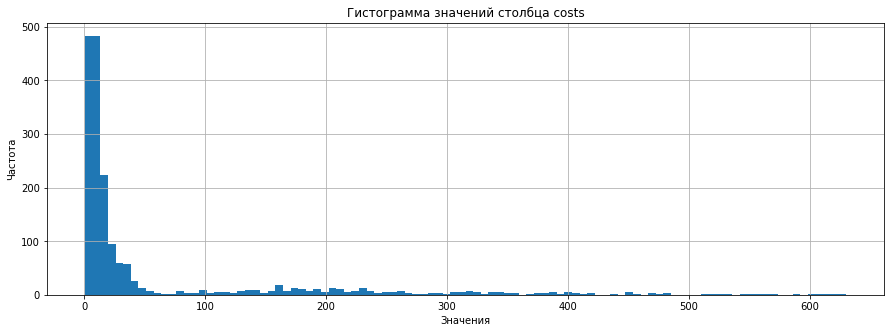

In [10]:
#гистограмма и характеристики
costs['costs'].plot(
    kind='hist',
    bins=100,
    figsize=(15,5),
    grid=True);
plt.title('Гистограмма значений столбца costs');
plt.xlabel('Значения')
plt.ylabel('Частота')

#основные характеристики
costs['costs'].describe()

 Очень большой разброс значений. Возможно, следует разделить значения столбца по каналам привлечения. Построим график расходов на рекламные кампании и диаграммы размаха для них в разбивке по каналам привлечения.

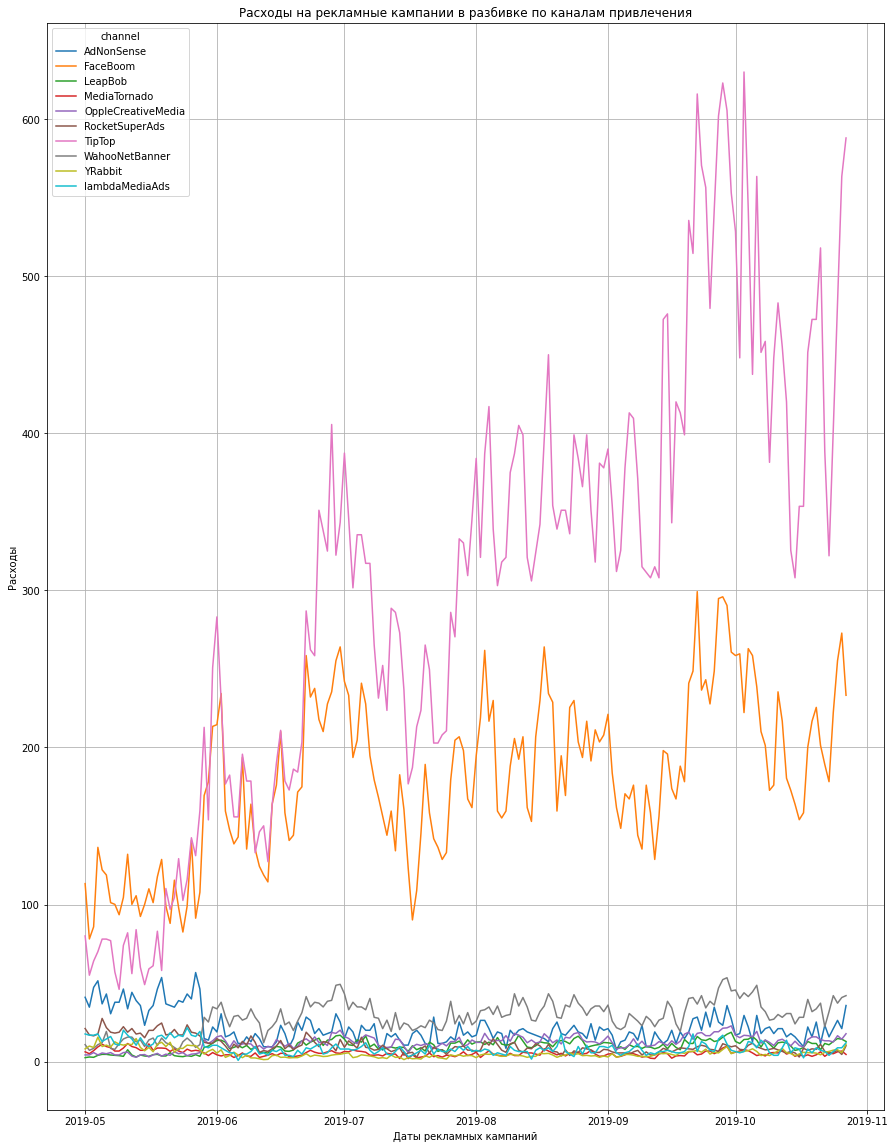

In [11]:
#график расходов
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(
    grid=True,
    figsize=(15,20))
plt.title('Расходы на рекламные кампании в разбивке по каналам привлечения')
plt.ylabel('Расходы')
plt.xlabel('Даты рекламных кампаний');

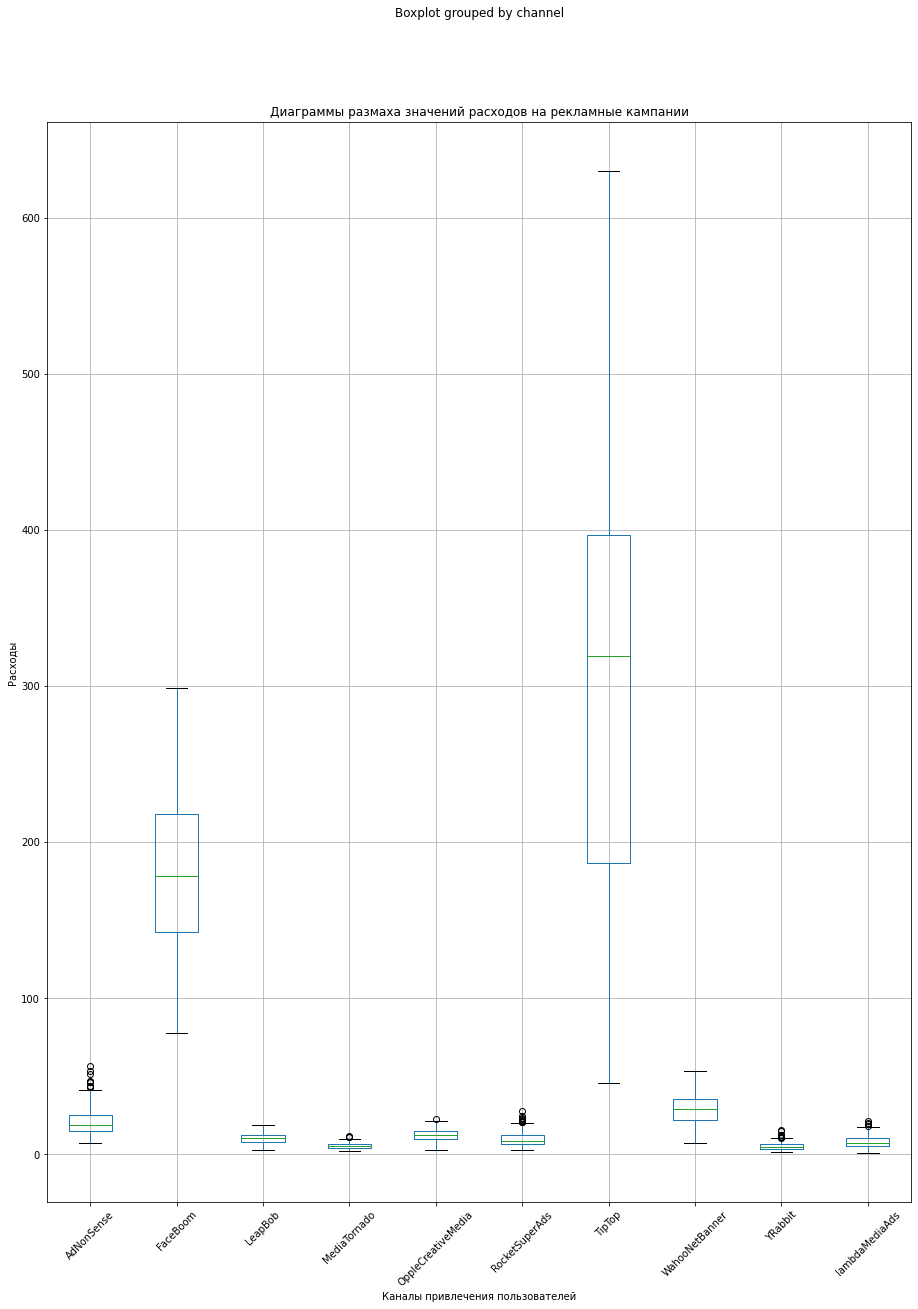

In [12]:
#диаграммы размаха
costs.boxplot('costs', 'channel', figsize=(15,20))
plt.title('Диаграммы размаха значений расходов на рекламные кампании')
plt.ylabel('Расходы')
plt.xlabel('Каналы привлечения пользователей')
plt.xticks(rotation=45);

Причина большого разброса значений в том, что стоимость рекламных кампаний очень разнится для разных каналов привлечения пользователей. Явных ошибок и аномалий нет. 

### Вывод по разделу подготовки данных

Данные загружены, названия столбцов приведены к правильному стилю. Столбцы датафреймов, содержащие время и даты, приведены к типу данных pandas datetime.

Дубликатов, явных ошибок и аномальных значений нет.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [13]:
#функция для создания профилей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time





In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 





In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
        
    ) 

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

    
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    



In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


## Исследовательский анализ данных

### Профили пользователей, минимальная и максимальная даты привлечения пользователей

In [20]:
#получение профилей пользователей
profiles = get_profiles(visits, orders, events=[], ad_costs=costs)

#общая информация и первые 5 строк датафрейма profiles 
profiles.info()

profiles.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [21]:
#определение минимальной и максимальной даты привлечения пользователей
min_acquisition_date = profiles['dt'].min()

#определение минимальной и максимальной даты привлечения пользователей
max_acquisition_date = profiles['dt'].max()

#вывод
display(f'Минимальная дата привлечения пользователей: {min_acquisition_date}', 
        f'Максимальная дата привлечения пользователей: {max_acquisition_date}')

'Минимальная дата привлечения пользователей: 2019-05-01'

'Максимальная дата привлечения пользователей: 2019-10-27'

Датафрейм с профилями пользователей создан. 

Минимальная дата привлечения пользователей: 01 января 2019г., максимальная дата привлечения пользователей: 27 октября 2019 г.

### Страны, из которых пользователи приходят в приложение. Распределение платящих пользователей по странам. Количество пользователей и доля платящих пользователей из каждой страны.



In [22]:
#функция для визуализации распределения пользователей по разным признакам

def users_payers(profs, col, title=''):
    try:
        

        #сводная таблица
        pivot = pd.merge((profs.pivot_table(
                            index=col, 
                            values='user_id', 
                            aggfunc={'user_id':'nunique'})
                         .sort_values(by='user_id')
                 ),(profs
                            .query('payer == True')
                            .pivot_table(
                                   index=col, 
                                   values='user_id', 
                                   aggfunc={'user_id':'nunique'})
                            .sort_values(by='user_id')
                            ),
                         left_index=True, right_index=True
                        )
        pivot.columns=['users', 'payers']

        pivot['payers_share_%'] = round(
                        (pivot['payers'] * 100 / pivot['users'])
                        , 2)

        display('Количество пользователей, количество и процент платящих пользователей', 
                    pivot)

        #диаграмма количества пользователей и платящих пользователей
        pivot[['users','payers']].plot(
            kind='barh',
            grid=True,
            figsize=(15, 5), 
            legend = ['Пользователи','Плательщики'])
        plt.title('Количество пользователей и плательщиков')
        plt.xlabel('Количество')
        plt.ylabel(title)
        plt.xticks(rotation=0)
        plt.legend(['Пользователи','Плательщики'])
        plt.show()    

        #диаграмма количества платящих пользователей
        pivot.sort_values(by='payers')['payers'].plot(
            kind='barh',
            grid=True,
            figsize=(12, 5))
        plt.title('Количество платящих пользователей')
        plt.ylabel(title)
        plt.xlabel('Количество')
        plt.xticks(rotation=0)
        plt.show()

        #процент платящих пользователей
        pivot.sort_values(by='payers_share_%')['payers_share_%'].plot(
            kind='barh',
            grid=True,
            figsize=(12, 5))
        plt.title('Процент платящих пользователей')
        plt.ylabel(title)
        plt.xlabel('Процент')
        plt.xticks(rotation=0)
        plt.show()
        
    except:
        return 'Ошибка работы функции users_payers'
    


'Количество пользователей, количество и процент платящих пользователей'

,users,payers,payers_share_%
region,,,
Germany,14981,616,4.11
France,17450,663,3.80
UK,17575,700,3.98
United States,100002,6902,6.90


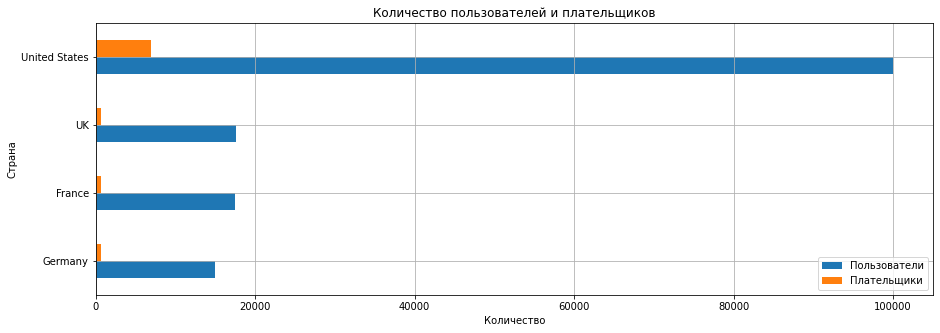

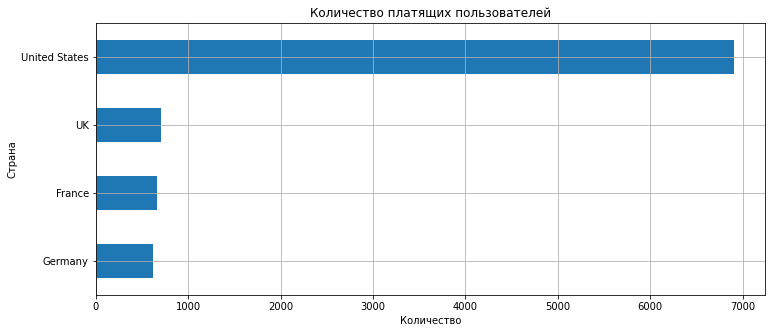

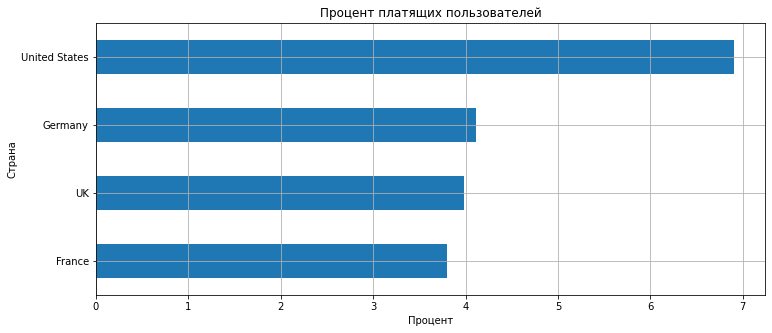

In [23]:
#распределение пользователей, платящих пользователей, процент платящих по странам
users_payers(profiles, 'region', 'Страна')    


По всем трём показателям лидирует США: 100002 пользователя, из них 6902 платящих (6,9%).
    
Показатели остальных стран намного ниже и близки друг к другу:
- Германия:	14981 пользователь, 616 платящих пользователей (4.11%);
- Франция: 17450 пользователей, 663 платящих пользователя (3.80%);
- Соединённое Королевство:	17575 пользователей,	700 платящих пользователей (3.98%).

### Устройства, которыми пользуются клиенты. Устройства, которые предпочитают платящие пользователи. Количество пользователей и доля платящих пользователей для каждого устройства.

'Количество пользователей, количество и процент платящих пользователей'

,users,payers,payers_share_%
device,,,
Mac,30042,1912,6.36
PC,30455,1537,5.05
Android,35032,2050,5.85
iPhone,54479,3382,6.21


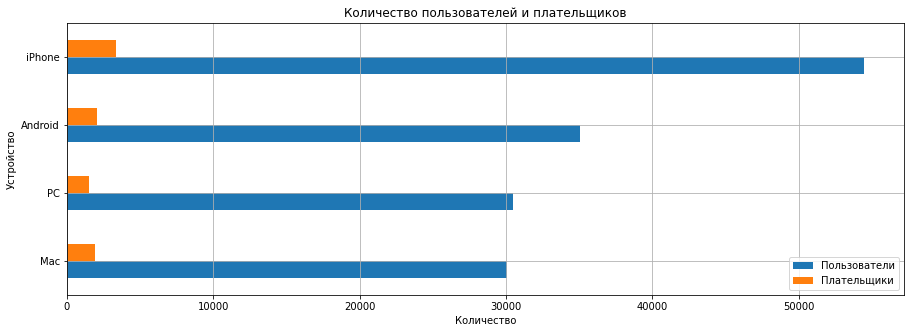

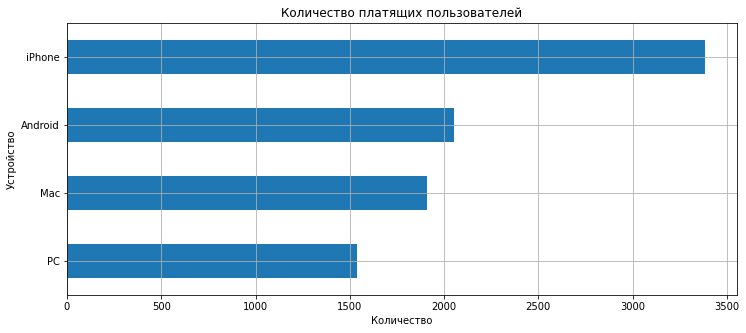

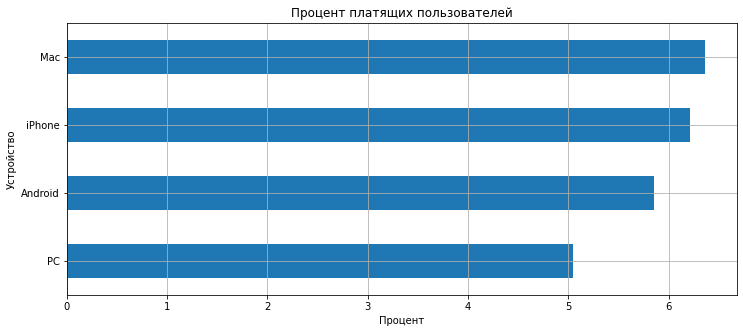

In [24]:
#распределение пользователей, платящих пользователей, процент платящих по устройствам
users_payers(profiles, 'device', 'Устройство')  



По количеству пользователей и плательщиков владельцы iPhone сильно опережают остальных: 54479 и 3382 соответственно. 

Показатели владельцев остальных устройств значительно ниже:
- Android: 35032 пользователя, 2050 платящих пользователей;
- PC: 30455 пользователей, 1537 платящих пользователей;
- Mac: 30042 пользователя,	1912 платящих пользователя.

По проценту платящих пользователей от всех картина другая: владельцы Mac опережают всех, сместив владельцев iPhone на второе место. Худший процент - среди владельцев PC.
- Mac: 6.36%;
- iPhone: 6.21%;
- Android: 5.85%;
- PC: 5.05%.

Приложение имеет наибольшую аудиторию (в том числе плательщиков) среди владельцев iPhone, наименьшую - среди владельцев Mac, но при этом процент совершающих покупки среди них выше. 

Наименее активыными покупателями выглядят владельцы PC: при общей аудитории чуть выше, чум у владельцев MAC покупателей среди первых них намного меньше, чем среди вторых, поскольку процент покупателей среди них заметно меньше.

### Рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей. Количество пользователей и доля платящих для каждого канала привлечения.

'Количество пользователей, количество и процент платящих пользователей'

,users,payers,payers_share_%
channel,,,
lambdaMediaAds,2149,225,10.47
AdNonSense,3880,440,11.34
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
WahooNetBanner,8553,453,5.30
OppleCreativeMedia,8605,233,2.71
TipTop,19561,1878,9.60


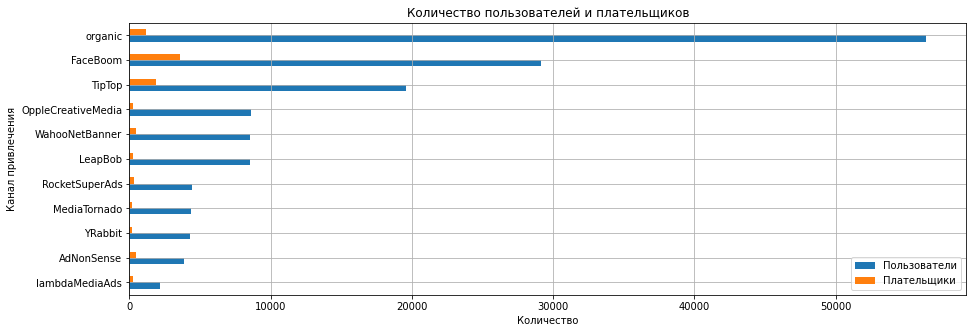

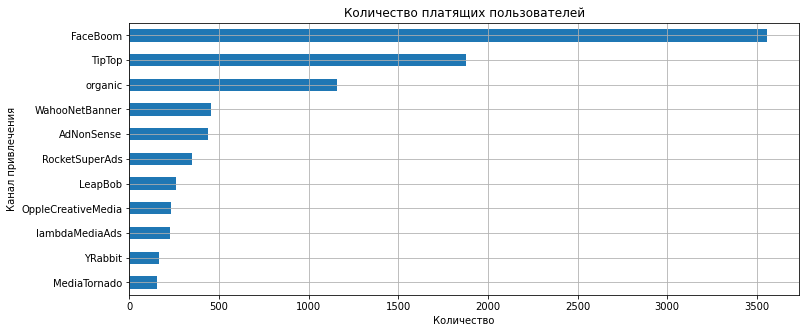

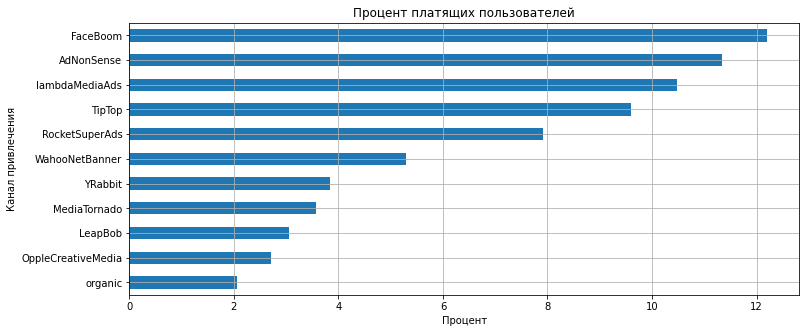

In [25]:
#распределение пользователей, платящих пользователей, процент платящих по каналам привлечения
users_payers(profiles, 'channel', 'Канал привлечения') 

Наибольшее количество пользователей приходят в приложение не из платных каналов привлечения (**"органический"** трафик): 58439 клиентов, при этом количество платящих из них всего 1160, что в несколько раз меньше, чем тот же показатель для ближайшего по количеству привлечённых пользователей платного канала (**FaceBoom**). Процент платящих среди **"органических"** пользователей минимальный: 2,06%.

Среди платных каналов привлечения по количеству выделяются несколько групп.

Прежде всего, выделяются два лидера, обгоняющие по количеству клиентов всех остальных: **FaceBoom** (29144) и **TipTop** (19561). Из них **FaceBoom** демонстрирует также наибольшее количество платящих пользователей (3557) и наибольший процент платящих пользователей (12,2%). 

Наименьший показатель привлечённой аудитории среди платных каналов у **lambdaMediaAds** (2149), но при этом у этого канала одно из самых высоких значений процента платящих пользователей (10,47%). Этот канал может быть потенциальной точкой роста.

Следующая группа по количеству пользователей - **OppleCreativeMedia** (8605), **WahooNetBanner**  (8553) и **LeapBob** (8553). Из них лучший процент привлечённых покупателей у **WahooNetBanner** (5,3%), у остальных заметно ниже - 2,71% для **OppleCreativeMedia** и 3,06 для **LeapBob**.

Последняя группа по количеству пользователей - **AdNonSense** (3880), **YRabbit** (4312), **MediaTornado** (4364) и **RocketSuperAds** (4448). **AdNonSense** демонстрирует один из самых высоких показателей процента платящих пользователей (11,34%) и может быть потенциальной точкой роста. Также хороший процент платящих среди пользователей **RocketSuperAds**, к тому же этот канал привлёк самую большую аудиторию из этой группы (4448).

Резюме: 
 - **"органический"** трафик приносит самое большое количество пользователей, но среди них минимальный процент платящих;
 - **FaceBoom** и **TipTop** явные фавориты среди платных каналов привлечения;
 - из прочих каналов следует отметить **WahooNetBanner**, **AdNonSense** и **RocketSuperAds** как потенциально перспективные точки роста аудитории.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общая сумма расходов на маркетинг. Распределение рекламных трат по источникам. 

In [26]:
#сумма расходов на маркетинг
ad_sum = round(costs['costs'].sum(), 2)
display(f'Общая сумма расходов на маркетинг: {ad_sum}')

#Распределение рекламных трат по источникам
channels_ad_sum = (costs.pivot_table(index='channel', 
                                     values='costs', 
                                     aggfunc='sum')
                        .sort_values(by='costs', ascending=False)
                  )
display('Таблица распределения расходов на маркетинг по рекламным источникам:')
channels_ad_sum


'Общая сумма расходов на маркетинг: 105497.3'

'Таблица распределения расходов на маркетинг по рекламным источникам:'

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


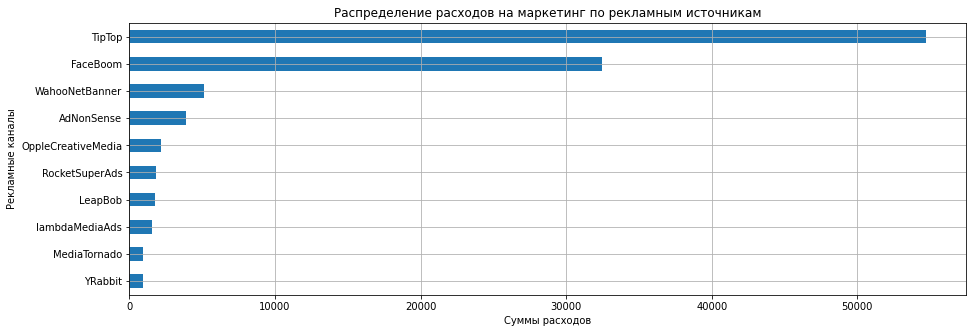

In [27]:
#диаграмма распределения рекламных расходов по каналам привлечения
(channels_ad_sum
        .sort_values(by='costs')
        .plot(
            kind='barh',
            grid=True,
            figsize=(15,5),
            legend=False
        )
);
plt.xlabel('Суммы расходов')
plt.ylabel('Рекламные каналы')
plt.title('Распределение расходов на маркетинг по рекламным источникам');

In [28]:
#доля расходов на каждый рекламный канал от общего бюджета
channels_ad_share = round(channels_ad_sum * 100 / ad_sum, 2)
channels_ad_share

,costs
channel,
TipTop,51.90
FaceBoom,30.75
WahooNetBanner,4.88
AdNonSense,3.71
OppleCreativeMedia,2.04
RocketSuperAds,1.74
LeapBob,1.70
lambdaMediaAds,1.48
MediaTornado,0.90


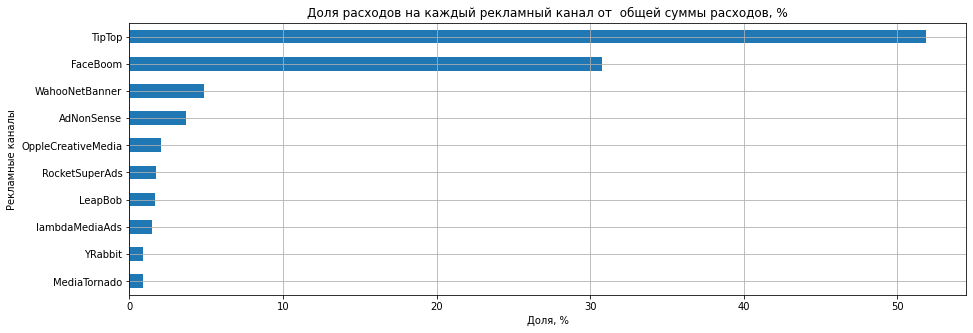

In [29]:
#диаграмма доли рекламных расходов по каналам привлечения
(channels_ad_share
        .sort_values(by='costs')
        .plot(
            kind='barh',
            grid=True,
            figsize=(15,5),
            legend=False
        )
);
plt.xlabel('Доля, %')
plt.ylabel('Рекламные каналы')
plt.title('Доля расходов на каждый рекламный канал от  общей суммы расходов, %');

Общая сумма расходов на маркетинг: 105497,3.

Наибольшие суммы были вложены в рекламные кампании через каналы привлечения **TipTop** (54751,3) и **FaceBoom** (32445,6). Наименьшие суммы израсходованы через каналы **MediaTornado** (945.48) и **YRabbit** (944.22).

### Динамика изменения расходов во времени по неделям по каждому источнику.

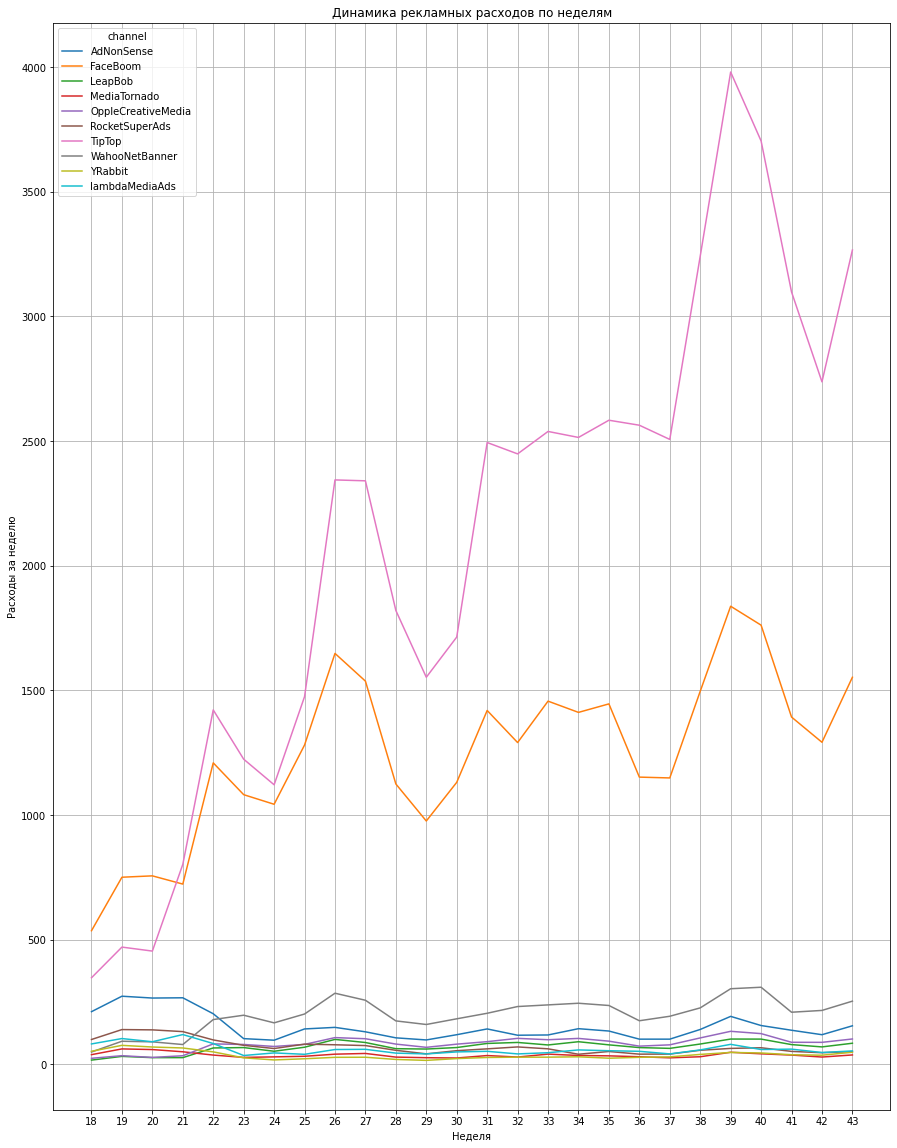

In [30]:
#копия датафрейма с рекламными расходами
costs_week = costs.copy()

##извлечение номеров месяцев
costs_week['dt'] = pd.to_datetime(costs_week['dt'])
costs_week['dt'] = costs_week['dt'].dt.isocalendar().week

#создание сводной таблицы
pivot = costs_week.pivot_table(index='dt', 
                  columns='channel', 
                  values='costs', 
                  aggfunc='sum')

#построение графика
pivot.plot(
         figsize=(15,20),
         grid=True
)
plt.xticks(pivot.reset_index()['dt']) 
plt.xlabel('Неделя')
plt.ylabel('Расходы за неделю')
plt.title('Динамика рекламных расходов по неделям');



### Динамика изменения расходов во времени по месяцам по каждому источнику.

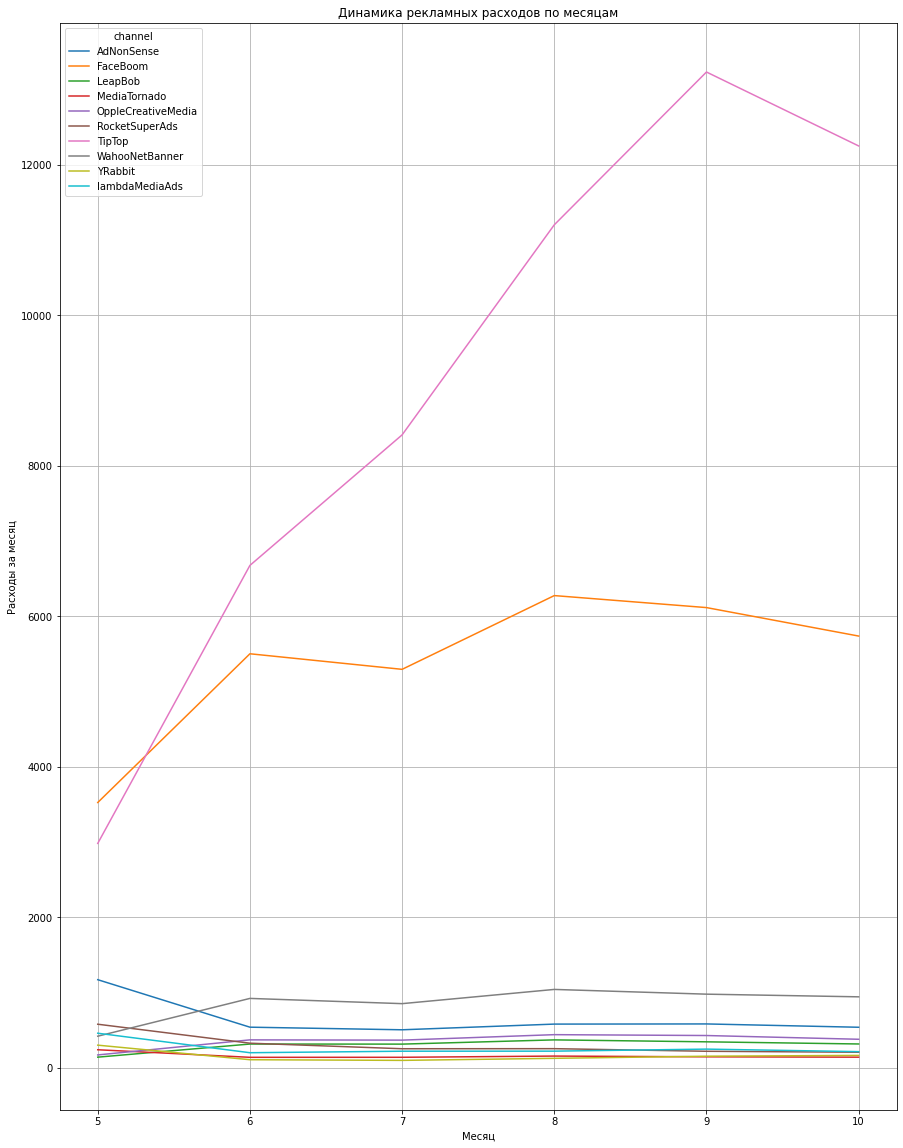

In [31]:
#копия датафрейма с рекламными расходами
costs_week = costs.copy()

#извлечение номеров месяцев
costs_week['dt'] = pd.to_datetime(costs_week['dt'])
costs_week['dt'] = costs_week['dt'].dt.month

#создание сводной таблицы
pivot = costs_week.pivot_table(index='dt', 
                  columns='channel', 
                  values='costs', 
                  aggfunc='sum')

#построение графика
pivot.plot(
         figsize=(15,20),
         grid=True
)
plt.xlabel('Месяц')
plt.ylabel('Расходы за месяц')
plt.title('Динамика рекламных расходов по месяцам');


Расходы на рекламу через наиболее используемый канал **TipTop** в среднем постепенно увеличивались с мая по август, в сентябре несколько снизились, с конца сентября снова последовал рост. Расходы на привлечение через второй по объёму затраченных средств канал **FaceBoom** увеличивались в мае-июне, затем колебались около 6000 в месяц.

В мае-июне расходы на рекламу были снижены для каналов **AdNonSence**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado**, и увеличены для **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob**. Начиная с конца июня соотношение расходов на все эти восемь каналов почти не менялось.

В течение периодов 23-24, 27-29, 35-36, 39-42 недель общие расходы снижались, на отрезках 21-22, 24-26, 29-31,37-39, 42-43 недель увеличивались. В среднем рекламные расходы увеличивались с мая до начала сентября, в сентябре снизились, с конца сентября последовал рост.

 ### Расчёт средней стоимости привлечения одного пользователя (CAC) из каждого источника.

In [32]:
display('Средняя стоимость привлечения (САС) пользователей для каждого канала:')
round(profiles.query('channel != "organic"')
        .groupby('channel')['acquisition_cost']
        .agg('mean')
        .sort_values(ascending=False), 2)
        


'Средняя стоимость привлечения (САС) пользователей для каждого канала:'

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
YRabbit               0.22
MediaTornado          0.22
LeapBob               0.21
Name: acquisition_cost, dtype: float64

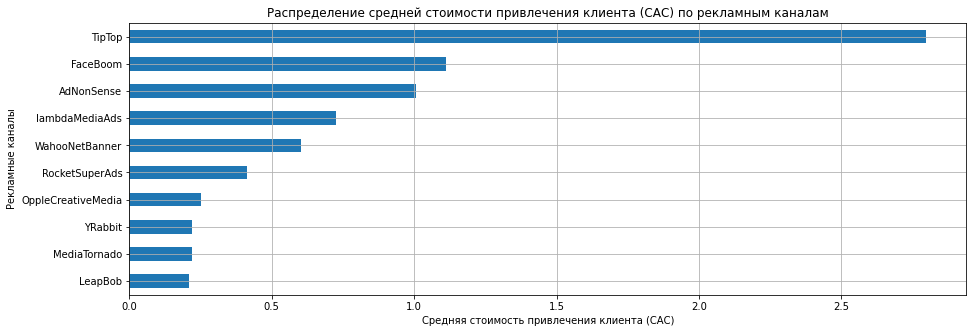

In [33]:
(profiles.query('channel != "organic"')
        .groupby('channel')['acquisition_cost']
        .agg('mean')
        .sort_values()
        .plot(
            kind='barh',
            grid=True,
            figsize=(15,5)
        )
);
plt.xlabel('Средняя стоимость привлечения клиента (САС)')
plt.ylabel('Рекламные каналы')
plt.title('Распределение средней стоимости привлечения клиента (САС) по рекламным каналам');

In [34]:
#средняя стоимость привлечения (CAC) для всех пользователей
display('Cредняя стоимость привлечения (CAC) для всех пользователей:', round(
               profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2
            )
       )


'Cредняя стоимость привлечения (CAC) для всех пользователей:'

1.13

### Вывод по разделу

Общая сумма расходов на маркетинг: 105497,3.

Наибольшие суммы были вложены в рекламные кампании через каналы привлечения **TipTop** (54751,3) и **FaceBoom** (32445,6). Наименьшие суммы израсходованы через каналы **MediaTornado** (945.48) и **YRabbit** (944.22).

Расходы на рекламу через наиболее используемый канал **TipTop** в среднем постепенно увеличивались с мая по август, в сентябре несколько снизились, с конца сентября снова последовал рост. Расходы на привлечение через второй по объёму затраченных средств канал **FaceBoom** увеличивались в мае-июне, затем колебались около 6000 в месяц.

В мае-июне расходы на рекламу были снижены для каналов **AdNonSence**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado**, и увеличены для **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob**. Начиная с конца июня соотношение расходов на все эти восемь каналов почти не менялось.

В течение периодов 23-24, 27-29, 35-36, 39-42 недель общие расходы снижались, на отрезках 21-22, 24-26, 29-31,37-39, 42-43 недель увеличивались. В среднем рекламные расходы увеличивались с мая до начала сентября, в сентябре снизились, с конца сентября последовал рост.

Средняя стоимость привлечения пользователей за весь период максимальна для канала, получившено максимальное финансирование - **TipTop** (2.8), вторым идёт канал **FaceBoom**, являющийся вторым лидером по объёму затраченных рекламных среств (1,11). Канал **AdNonSence** имеет близкий к каналам-лидерам показатель средней стоимости привлечения клиентов. Минимальная средняя стоимость привлечения у каналов **OppleCreativeMedia** (0.25), **YRabbit** (0.22), **MediaTornado** (0.22) и **LeapBob** (0.21).

## Оценка окупаемость рекламы

### Исключение пользователей, пришедших в приложение не из рекламных источников

Поскольку целью исследования является анализ окупаемости расходов на рекламу, необходимо исключить данные о пользователях, пришедших через "органический" трафик, привлечение которых не связано с расходованием рекламных средств, чтобы они не искажали результат.

In [35]:
profiles_ads = profiles.query('channel != "organic"')

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.



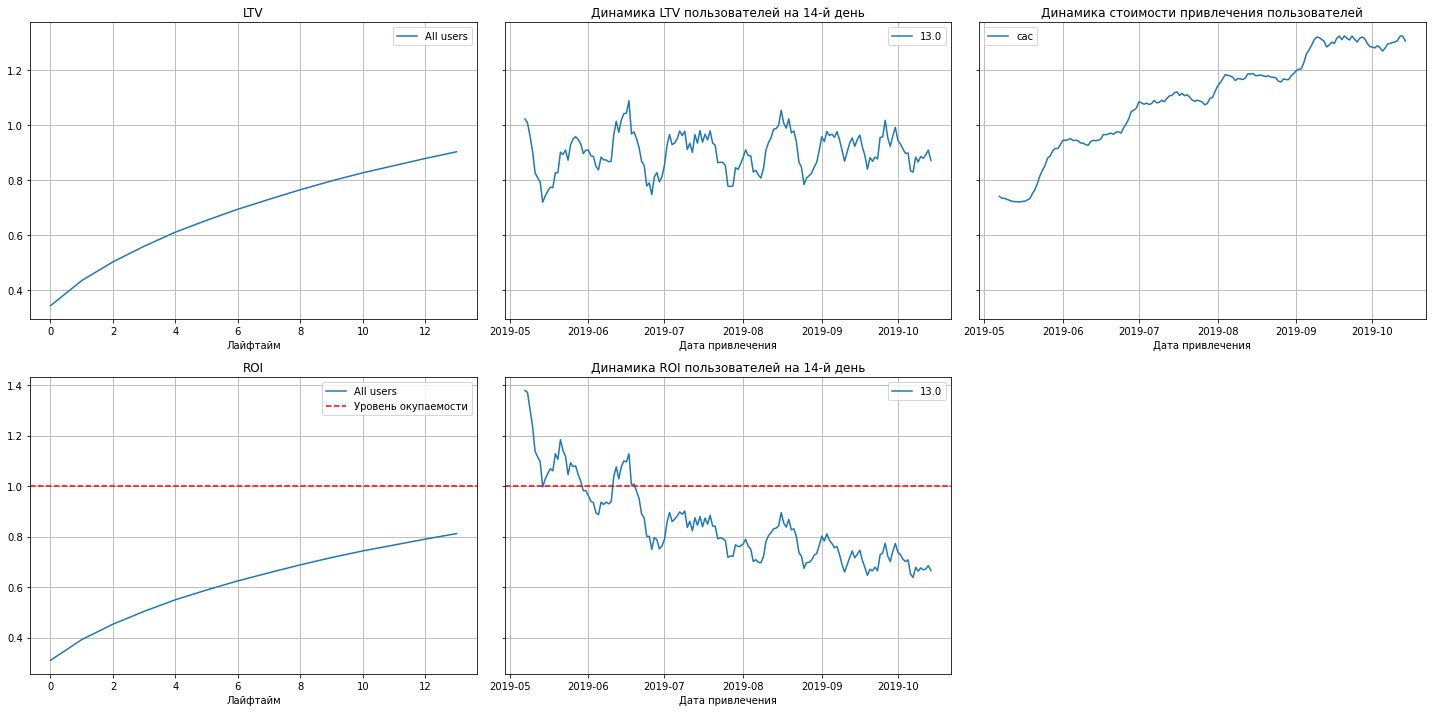

In [36]:
#получение LTV и ROI
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles_ads,
    orders,
    max_acquisition_date,
    14,
    dimensions=[],
    ignore_horizon=False,
)

#графики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, 14, window=7)


In [37]:
#дополнительно выведем 
display('LTV', round(ltv,2), '')              #LTV
display('ROI', round(roi,2), '')              #ROI 
display('Динамика CAC за май - июнь',         #а также динамику CAC за май-июнь
        round(roi_in_time
              .query('index < @pd.to_datetime("2019-06-30")')['cac'],2))

'LTV'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,86138,0.34,0.44,0.5,0.56,0.61,0.65,0.69,0.73,0.77,0.8,0.83,0.85,0.88,0.9


''

'ROI'

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,86138,1.11,0.31,0.39,0.45,0.5,0.55,0.59,0.62,0.66,0.69,0.72,0.74,0.77,0.79,0.81


''

'Динамика CAC за май - июнь'

dt
2019-05-01    0.78
2019-05-02    0.71
2019-05-03    0.76
2019-05-04    0.74
2019-05-05    0.73
2019-05-06    0.73
2019-05-07    0.73
2019-05-08    0.73
2019-05-09    0.71
2019-05-10    0.74
2019-05-11    0.71
2019-05-12    0.71
2019-05-13    0.72
2019-05-14    0.73
2019-05-15    0.73
2019-05-16    0.72
2019-05-17    0.74
2019-05-18    0.74
2019-05-19    0.74
2019-05-20    0.85
2019-05-21    0.83
2019-05-22    0.89
2019-05-23    0.92
2019-05-24    0.88
2019-05-25    0.86
2019-05-26    0.93
2019-05-27    0.90
2019-05-28    0.96
2019-05-29    0.95
2019-05-30    0.92
2019-05-31    0.97
2019-06-01    0.98
2019-06-02    0.93
2019-06-03    0.92
2019-06-04    0.99
2019-06-05    0.90
2019-06-06    0.92
2019-06-07    0.96
2019-06-08    0.92
2019-06-09    0.93
2019-06-10    0.88
2019-06-11    0.97
2019-06-12    1.00
2019-06-13    0.95
2019-06-14    0.96
2019-06-15    0.93
2019-06-16    0.97
2019-06-17    0.98
2019-06-18    0.97
2019-06-19    1.02
2019-06-20    0.97
2019-06-21    0.92
2019-06-2

Дополнительно изучим динамику размеров когорт.

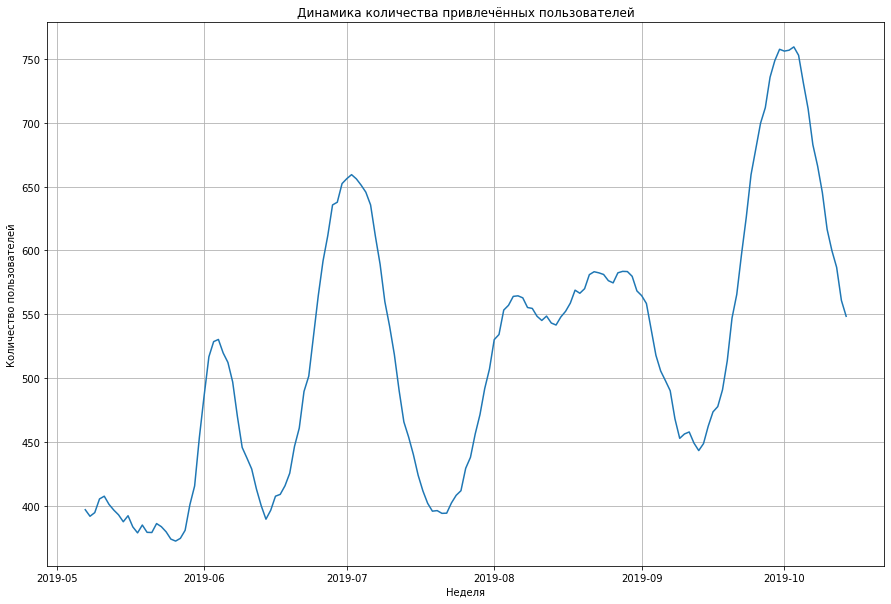

In [38]:
#график динамики размеров когорт
filter_data(ltv_in_time
            .reset_index()
            .set_index('dt'
                      ), 7)['cohort_size'].plot(
                                            figsize=(15,10),
                                            grid=True
                                           );
plt.title('Динамика количества привлечённых пользователей')
plt.xlabel('Неделя')
plt.ylabel('Количество пользователей');

LTV клиентов 14-го дня в среднем достигает значения 0,9. 

LTV клиентов 14-го дня падает для клиентов, привлечённых в первой половине мая, затем растёт для клиентов, привлечённых до конца мая, после чего колеблется около значения 0,9 до конца периода наблюдения, падая для клиентов, привлечённых в начале июня и во второй половине июня, июля и августа, в середине сентября и начале октября.

Стоимость привлечения клиентов (САС) также растёт на протяжении всего времени наблюдений, начиная с 0,71 - 0,78 в первой половине мая до значений более 1 к концу июня, затем последовал постепенный рост до сентября: по-видимому, расходы увеличивались в конце июня, начеле августа и сентября, чтобы увеличить снизившиеся к этому моменту значения LTV 14-го дня; после чего расходы колебались около 1,80 до конца периода наблюдений.

Значение возврата на инвестиции (ROI) на 14 лайфтайм (0,81) по периоду наблюдений по всем клиентам в среднем не выходит на точку окупаемости. В динамике ROI падает в первой половине мая, затем следует короткий рост, после чего ROI падает ниже точки окупаемости, затем в первой половине июня колеблется вокруг уровня окупаемости, затем постепенно падает до уровня менее 70% в октябре.

Можно сделать следующий вывод:руководством было принято решение с середины мая начать активно вкладывать средства в рекламные кампании, рекламный бюджет был увеличен в полтора раза (что подтверждается данными из раздела 4). Это привело к росту LTV клиентов, который продолжался на протяжении короткого периода времени, однако затем рост LTV остановился, после чего несмотря на постепенное увеличение расходов LTV в среднем оставался в одних и тех же рамках, вследствие чего возврат на инвестиции (ROI) упал ниже уровня окупаемости и впоследствии падал дальше. 

Необходимо выяснить, почему при росте расходов на рекламу рост LTV 14-го дня почти сразу остановился, что привело к падению ROI ниже окупаемости.

### Конверсия пользователей и динамика её изменения. Удержание пользователей. Графики конверсии и удержания.

In [39]:
#вычисление конверсии
conversion_raw, conversion, conversion_in_time = get_conversion(
                                                    profiles_ads,
                                                    orders,
                                                    max_acquisition_date,
                                                    14,
                                                    dimensions=[],
                                                    ignore_horizon=False,
                         )

#вывод
display('Конверсия: ' , round(conversion, 4))


'Конверсия: '

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,86138,0.0586,0.0663,0.0699,0.0725,0.0744,0.0757,0.0767,0.0775,0.0782,0.0789,0.0793,0.0796,0.0798,0.0801


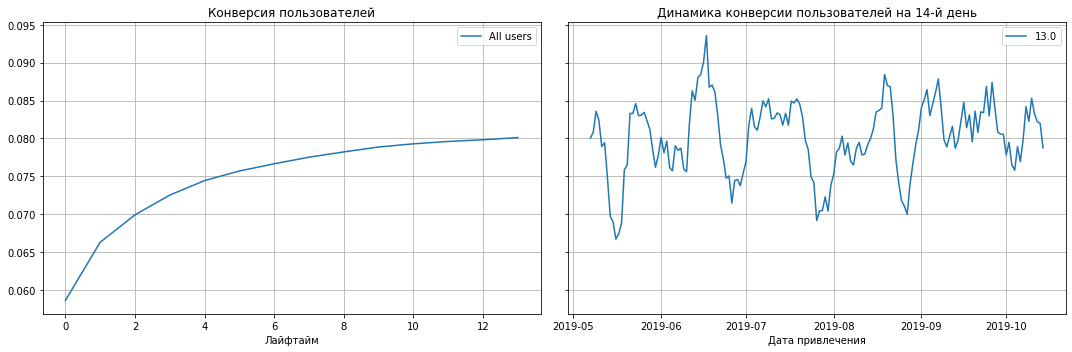

In [40]:
#построение графика конверсии
plot_conversion(conversion, conversion_in_time, horizon=14, window=7)

Средняя конверсия по всем пользователям, привлечённым через рекламные источники, достигает уровня 8,01%.

График динамики конверсии на 14-й день кореллирует с графиками динамики LTV 14-го дня и динамики расходов на привлечение кликнтов (CAC). Для для клиентов, привлечённых в первой половине мая конверсия падает, что приводит к падению LTV, затем происходит увеличение рекламных расходов, следует рост конверсии и LTV, затем ситуация повторяется во второй половине июня, июля и августа, а также в конце сентября-начале октября. 

Необходимо выяснить причину снижения конверсии при сохранении уровня вложений в рекламу для для клиентов, привлечённых в начале мая, в первой половине июня, июля и августа, конце сентября.

In [41]:
#удержание пользователей
retention_raw, retention, retention_in_time = get_retention(
    profiles_ads,
    visits,
    max_acquisition_date,
    14,
    dimensions=[],
    ignore_horizon=False,
)

#удержание
round(retention, 4)

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,79036,1.0,0.1770,0.0866,0.0520,0.0333,0.0245,0.0185,0.0143,0.0116,0.0095,0.0075,0.0063,0.0061,0.0048
True,7102,1.0,0.3813,0.2925,0.2361,0.2119,0.1914,0.1684,0.1571,0.1447,0.1363,0.1352,0.1226,0.1197,0.1064


Интерес неплатящих пользователей к приложению невысок и довольно быстро снижается от 17,7% в первый день до 0,5% на 14 день.

Удержание платящих пользователей в среднем снижается от 38,1% до 10% к 14 лайфтайму.

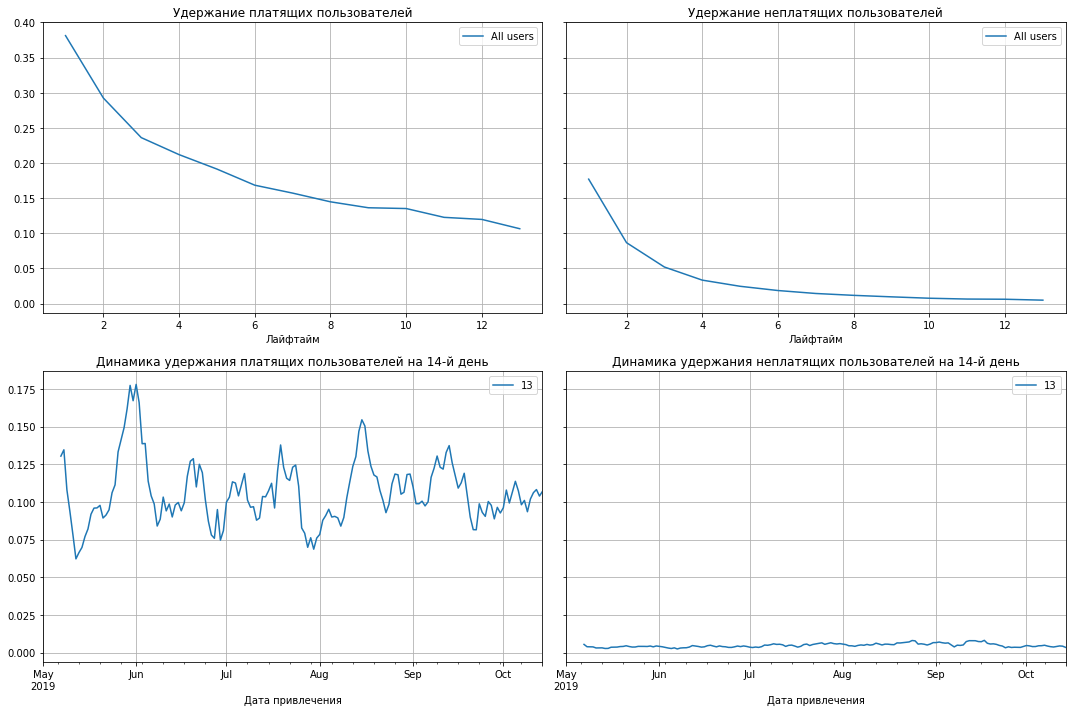

In [42]:
#график динамики удержания
plot_retention(retention, retention_in_time, horizon=14, window=7)

Динамика удержания пользователей на 14 день после привлечения демонстрирует ту же картину, что и динамика LTV: падение  удержания пользователей, привлечённых в начале мая, в начале июня и во второй половине июня, июля и августа, в середине сентября и начале октября.

#### Конверсия пользователей и динамика её изменения, удержание пользователей в разбивке по устройствам. Графики конверсии и удержания.

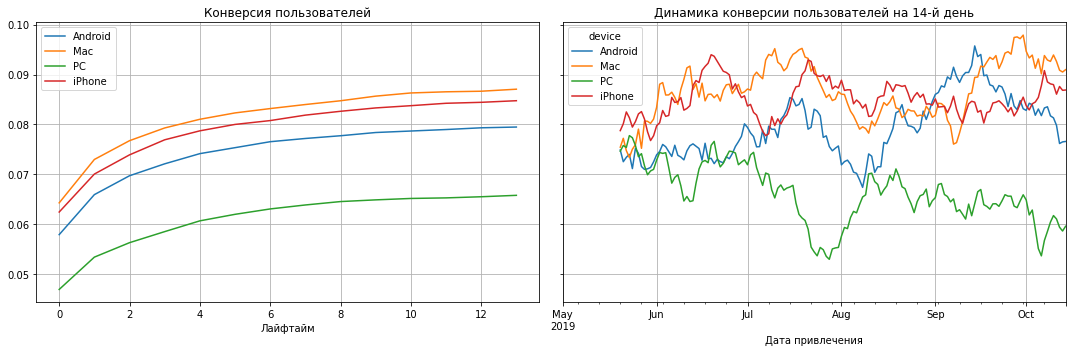

In [43]:
#вычисление конверсии
conversion_raw, conversion, conversion_in_time = get_conversion(
                                                    profiles_ads,
                                                    orders,
                                                    max_acquisition_date,
                                                    14,
                                                    dimensions=['device'],
                                                    ignore_horizon=False,
)


#построение графика конверсии
plot_conversion(conversion, conversion_in_time, horizon=14, window=20)

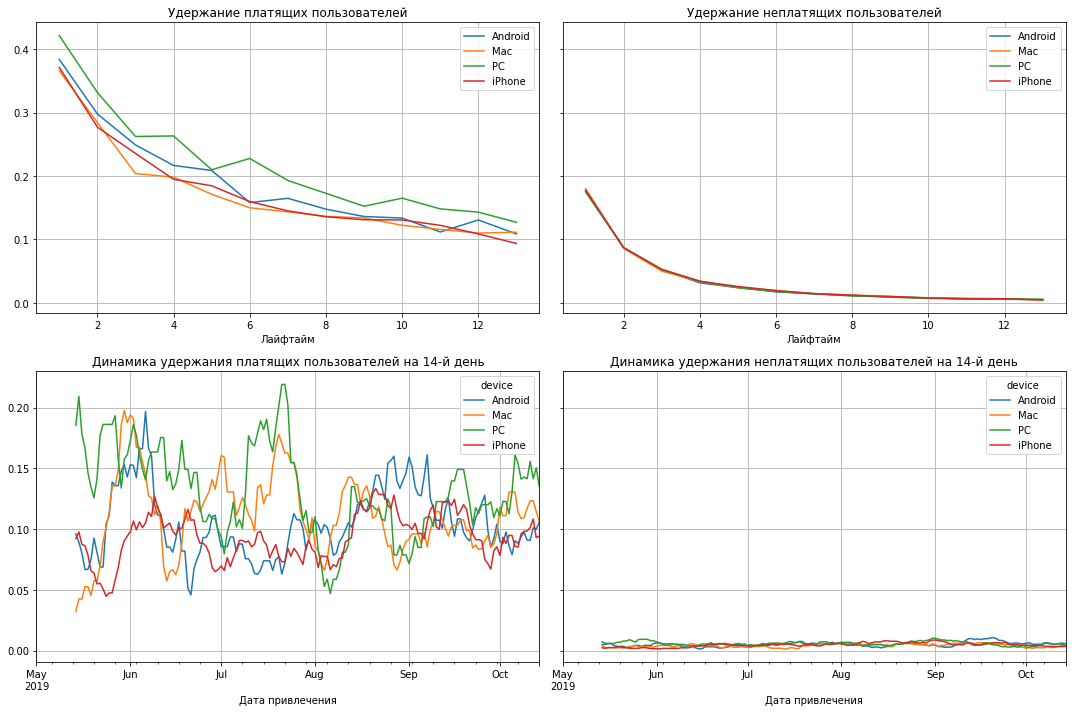

In [44]:
#удержание пользователей
retention_raw, retention, retention_in_time = get_retention(
    profiles_ads,
    visits,
    max_acquisition_date,
    14,
    dimensions=['device'],
    ignore_horizon=False,
)

#график динамики удержания
plot_retention(retention, retention_in_time, horizon=14, window=14)

Конверсия пользователей **PC** кратно ниже, чем у пользователей остальных устройств, при этом постепенно снижается. Наибольшая конверсия у пользователей **iPhone** и **Mac**.

Удержание пользователей **PC** немного выше, чем пользователей остальных устройств.

#### Конверсия пользователей и динамика её изменения, удержание пользователей в разбивке по странам. Графики конверсии и удержания.

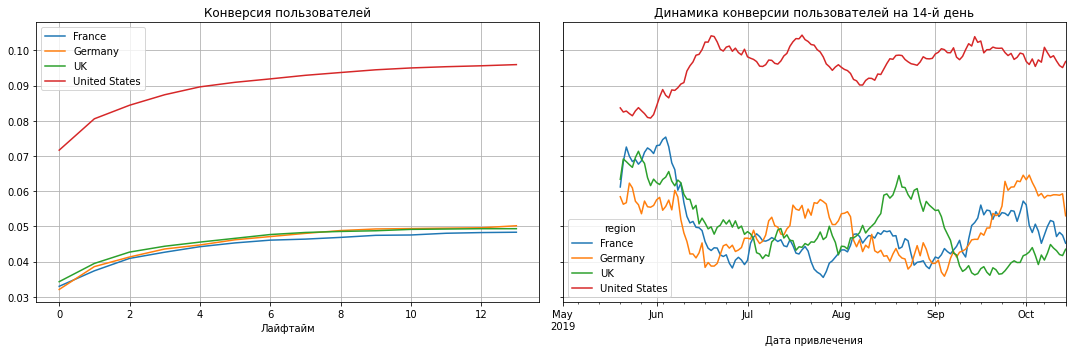

In [45]:
#вычисление конверсии
conversion_raw, conversion, conversion_in_time = get_conversion(
                                                    profiles_ads,
                                                    orders,
                                                    max_acquisition_date,
                                                    14,
                                                    dimensions=['region'],
                                                    ignore_horizon=False,
)


#построение графика конверсии
plot_conversion(conversion, conversion_in_time, horizon=14, window=20)

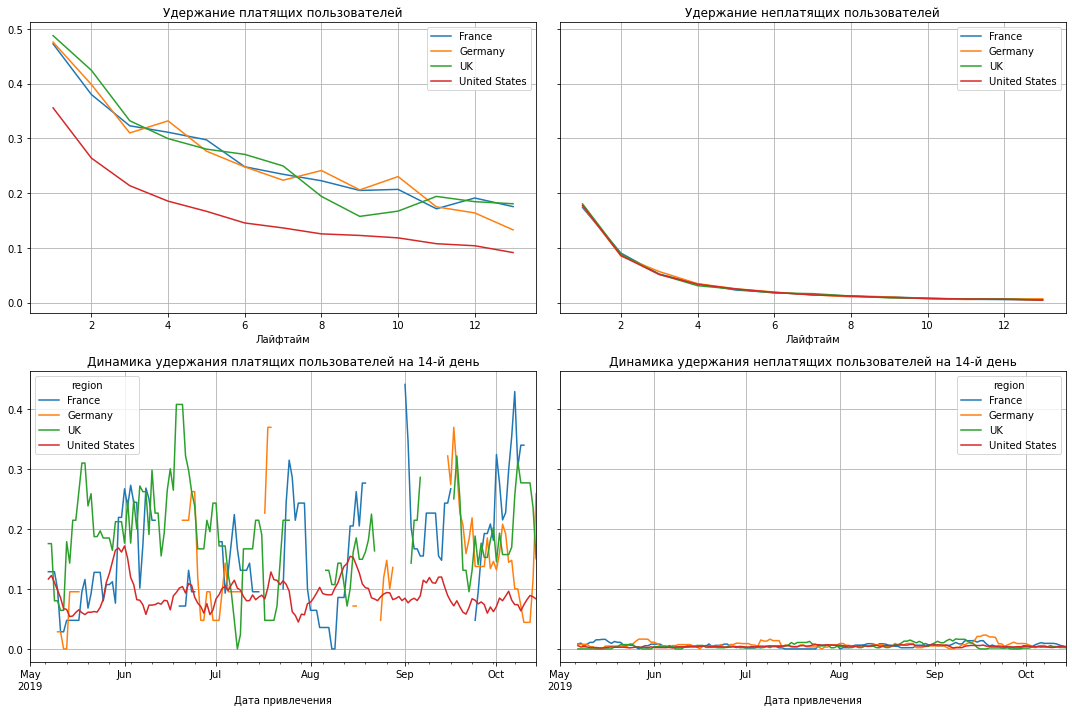

In [46]:
#удержание пользователей
retention_raw, retention, retention_in_time = get_retention(
    profiles_ads,
    visits,
    max_acquisition_date,
    14,
    dimensions=['region'],
    ignore_horizon=False,
)

#график динамики удержания
plot_retention(retention, retention_in_time, horizon=14, window=7)

Общая конверсия за весь период наблюдений в США почти вдвое выше, чем в остальных странах. В динамике видно, что конверсия в США была выше, чем в других странах на момент начала наблюдений (май), а с июня увеличилась примерно на 15%, в то время как конверсия в других странах сопоставимо снизилась.

Общее удержание пользователей в США примерно на 20% ниже, чем в остальных трёх странах, показатели которых близки друг к другу. Удержание пользователей в США сотаётся примерно на одном уровне на протяжении всего преиода наблюдений. Для оцнеки динамики удержания пользователей из других стран, видимо недостаточно данных: можно лишь сказать, что удержание пользователей из Соединенного Королевства росло в мае-июне, затем снизилось в конце июня-начале июля.

#### Конверсия пользователей и динамика её изменения, удержание пользователей в разбивке по рекламным каналам. Графики конверсии и удержания.

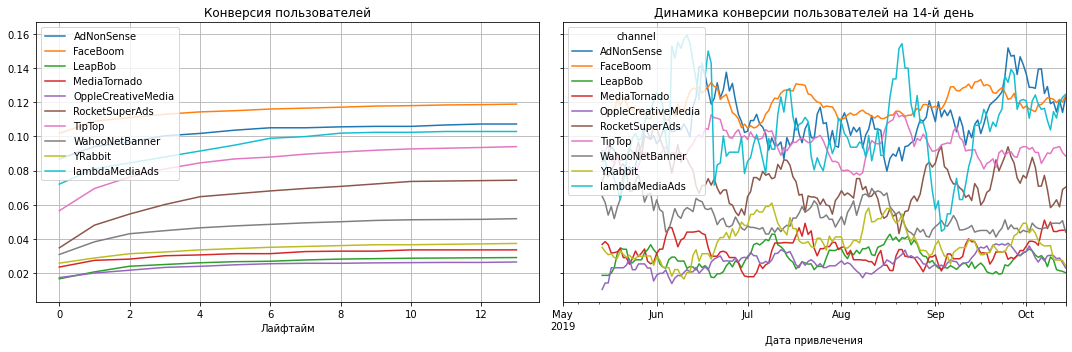

In [47]:
#вычисление конверсии
conversion_raw, conversion, conversion_in_time = get_conversion(
                                                    profiles_ads,
                                                    orders,
                                                    max_acquisition_date,
                                                    14,
                                                    dimensions=['channel'],
                                                    ignore_horizon=False,
)


#построение графика конверсии
plot_conversion(conversion, conversion_in_time, horizon=14, window=14)

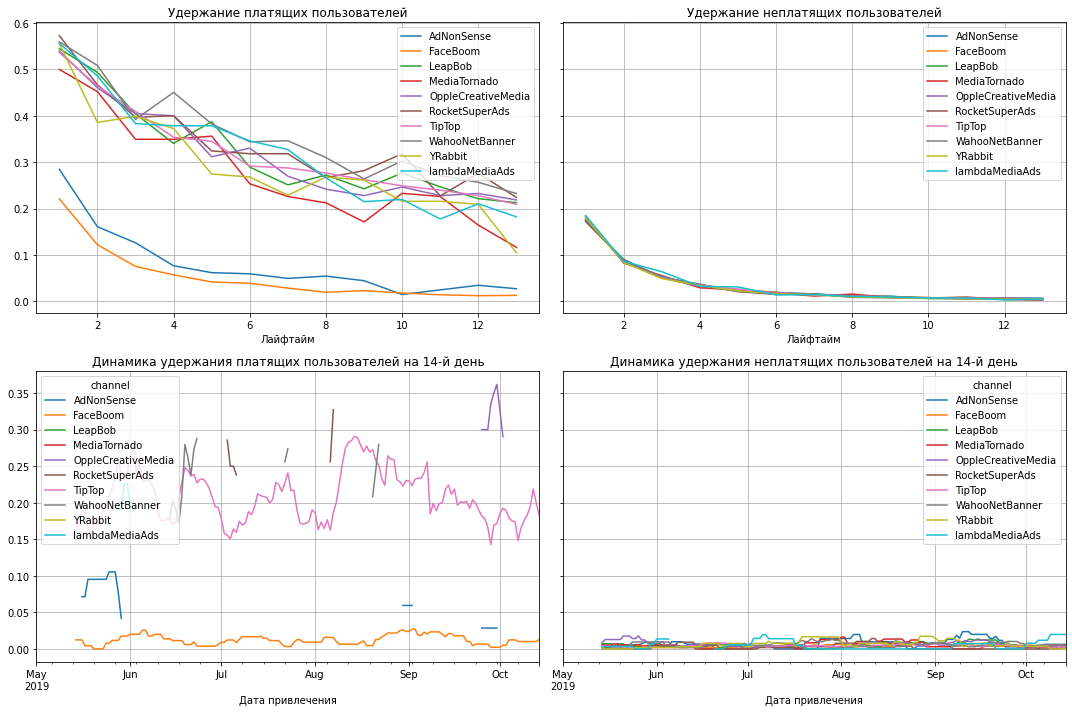

In [48]:
#удержание пользователей
retention_raw, retention, retention_in_time = get_retention(
    profiles_ads,
    visits,
    max_acquisition_date,
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)

#график динамики удержания
plot_retention(retention, retention_in_time, horizon=14, window=14)

Наибольшая конверсия у пользователей, привлечённых через каналы **FaceBoom**, **AdNonSence**, **lambdaMediaAds** и **TipTop**. Из них конверсия **Faceboom** и **TipTop** остаётся стабильной в динамике, конверсия  **AdNonSence** проседает в июле-начале сентября, а конверсия **lambdaMediaAds** показывает скачок в июне и провал в начале сентября. Явные аутсайдеры - **Yrabbit**, **MediaTornado**, **LeapBob** и **OppleCreativeMedia**. Конверсия на канале **WahooNetBanner**, сравнительно невысокая, демонстрирует к тому же снижение в динамике. Конверсия канала **RocketSuperAds** стабильно средняя. 

Удержание пользователей **FaceBoom** и **AdNonSence** гораздо хуже, чем у остальных каналов. Остальные каналы демонстрируют схожие показатели, кроме **Yrabbit** и **MediaTornado**, удержанире 14-го дня у которых почти вдвое ниже, чем у остальных.

Данных для оценки динамики удержания достаточно только для **FaceBoom**, чьё удержание пользователей на 14-й день стабильно низкое, около нуля. И **TipTop**, удержание в которой сильно колеблется вокруг одного и того же значения в течение периода наблюдений, с общей тенденцией к небольшому снижению.

### Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

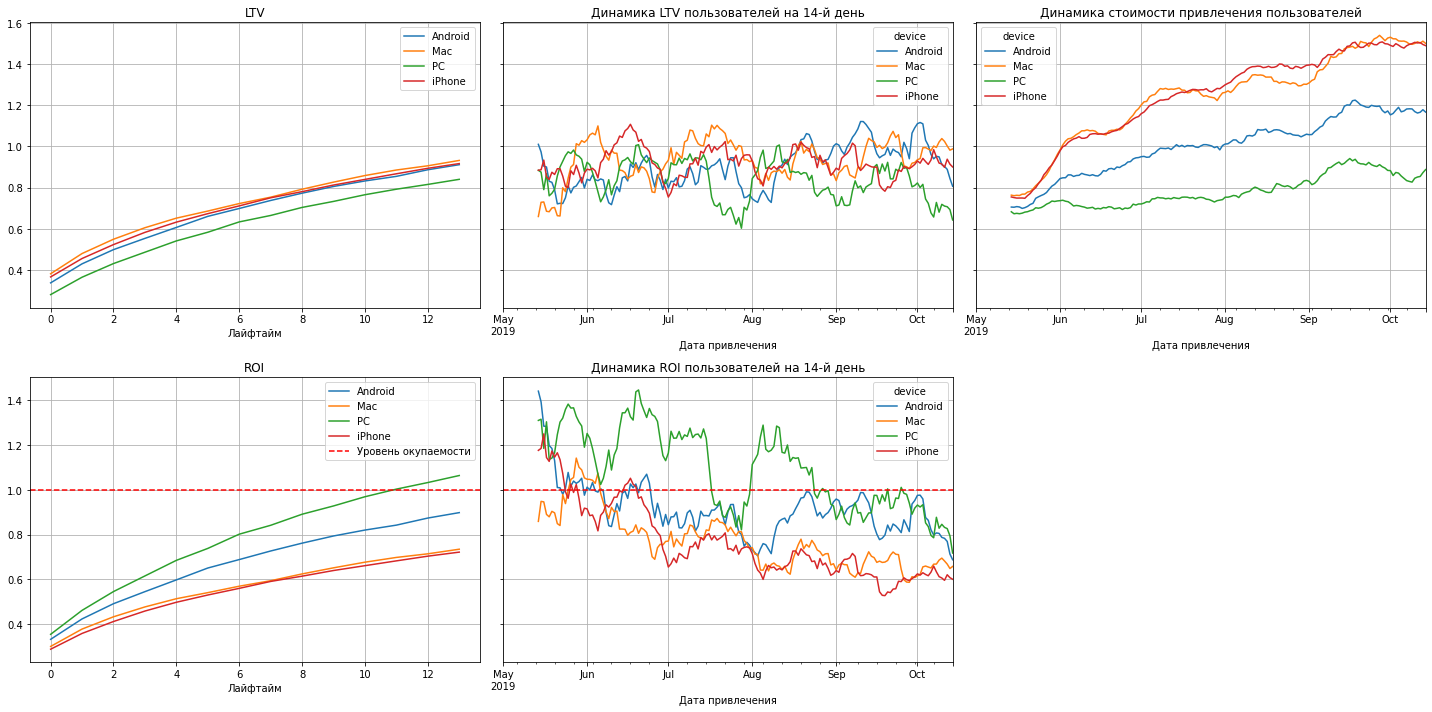

In [49]:
#получение LTV и ROI
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles_ads,
    orders,
    max_acquisition_date,
    14,
    dimensions=['device'],
    ignore_horizon=False,
)

#графики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, 14, window=14)

Из всех устройств на уровень окупаемости выходят только показатели пользователей PC. Хуже обстоят дела с пользователями Andriod. Худшие по показателю возврата на инвестиции и окупаемости - пользователи iPhone и Mac. 

Превосходство показателей окупаемости пользователей PC И Android над iPhone и Mac очевидно связано с тем, что рост расходов на рекламу  для последних значительно превышают рост расходов на рекламу для первых, при том что LTV для всех устройств в среднем за весь период наблюдений колеблется вокруг одних и тех же значений.

Динамика LTV и CAC 14-го дня в целом соответствует паттерну, выявленному на предыдущих этапе исследования: при стабильных расходах на рекламу или их незначительном уменьшении выручка падает; рост вложений в рекламу приводит к кратковременному (1-2 недели) росту LTV, однако затем присохранении уровня финансирования рекламных каналов LTV длоя всех устройств падает до следующего периода  увеличения вложений в рекламу; затем ситуация повторяется. 

Пользователи PC активнее прочих реагируют как на дополнительные волжения в рекламу, так и на сохранение/уменьшение расходов на рекламные кампании.

### Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

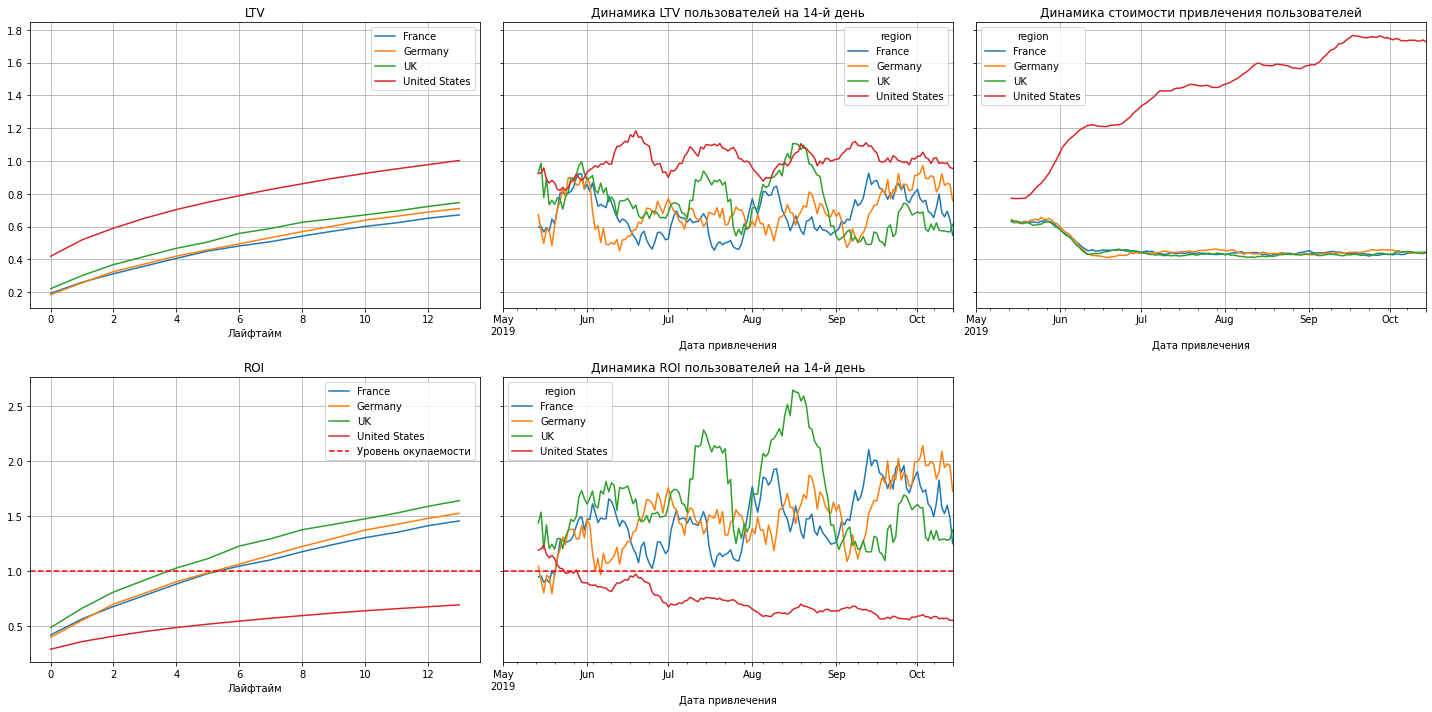

In [50]:
#получение LTV и ROI
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles_ads,
    orders,
    max_acquisition_date,
    14,
    dimensions=['region'],
    ignore_horizon=False,
)

#графики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, 14, window=14)

Самый высокий показатель LTV 14-го дня - у пользователей из США, он превышает значение 1, LTV для других стран близки друг к другу. Очевидно, по этой причине руководством компании в середине мая было приянто решение перераспределить рекламный бюджет в пользу проведения кампаний в США стране за счёт остальных. Однако рост выручки от пользователей в этой стране в первой половине июня оказался недостаточным, прекратился во второй половине июня, и дальше не рос, а стабильно колебался вокруг одного значения (1), в результате чего возврат на инвестиции опустился ниже уровня окупаемости и затем продолжил падать.
Всё это привело к тому, что окупаемость вложений в рекламу в США оказалась намного ниже, чем в других странах.

Из других стран следует отметить Соединённое Королевство: LTV 14-го дня пользователей, привлечённых в июле и августе в этой стране в среднем выше, чем в других странах, кроме того, этот показатель в этой стране увеличивался без дополнительных вложений в рекламу. Также снижение рекламных расходов в этой стране в конце мая-начале июня не привело к заметному снижению LTV 14-го дня. Всё что может свидетельствовать об интересе потенциальных пользователей к приложению в этой стране. 

Вывод: увеличение рекламных расходов в США оказалось неэффективным. Высокая конверсия пользователей в покупатели в этой стране компенсируется низким удержанием. Рекомендую изучить возможность дополнительного вложения средств в рекламу в Соединённом Королевстве.

### Окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

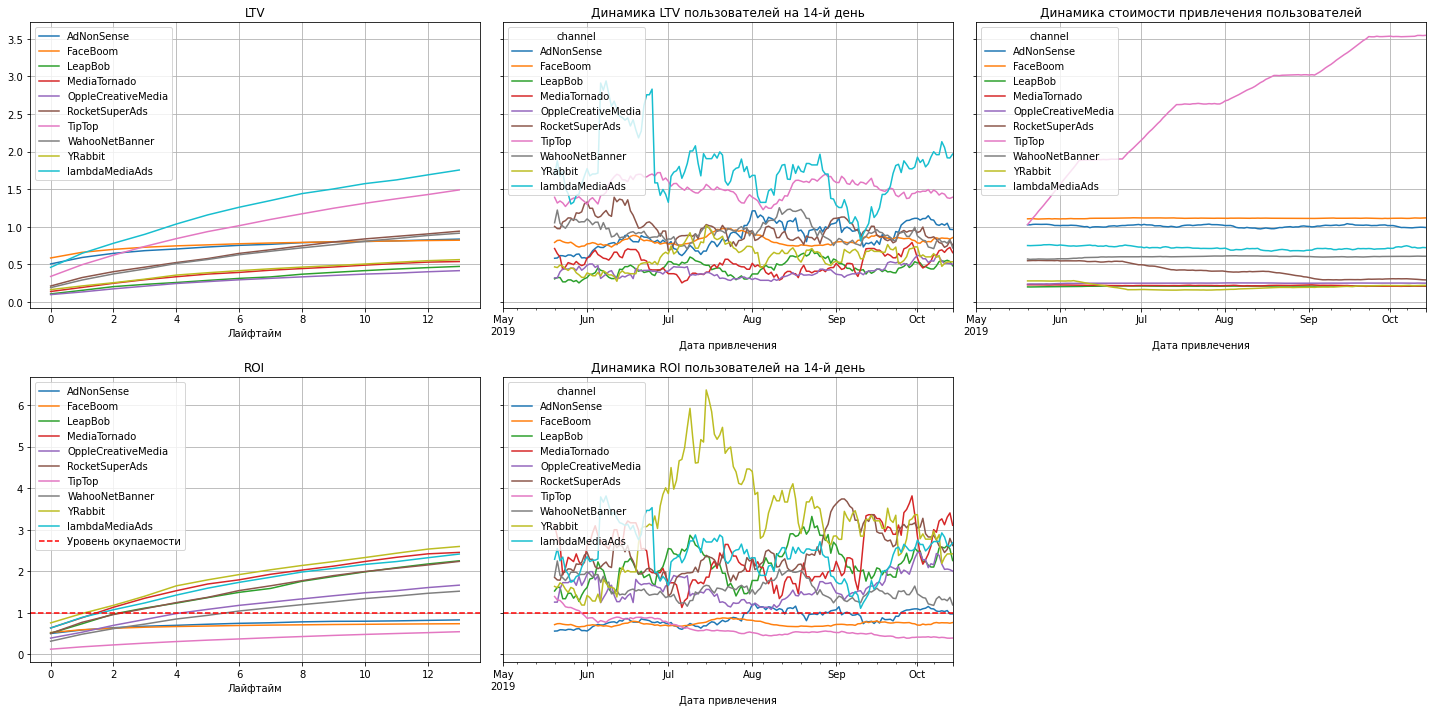

In [51]:
#получение LTV и ROI
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles_ads,
    orders,
    max_acquisition_date,
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)

#графики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, 14, window=20)

Дополнительное вложение в рекламу через канал **FaceBoom** привело к росту количества привлекаемых клиентов: этот вывод можно сделать из того, что стоимость привлечения осталась на одном уровне при увеличении рекламных расходов (см.пункт 4.3) и стабильном LTV. Однако окупаемость инвестиций на этом канале осталась практически на прежнем уровне, что означает, что увеличившаяся привлечённая аудитория не приносит дополнительной выручки; вероятно, средний чек привлечённой в результате рекламы аудитории оказался ниже, чем раньше, т.е. привлечённые в результате рекламы клиенты - менее "качественные". Кроме того, очень низкий LTV пользователей этого канала несмотря на дополнительные вложения в рекламу почти не растёт с увеличением лайфтайма, что также говорит о низком "качестве" клиентов. Возврат на инвестиции по этому каналу почти не изменился и остался ниже уровня окупаемости. При том, что у этого канала очень высокая конверсия,  удержание пользователей здесь очень низкое. Вероятно, дополнительная реклама на этом канале привлекает в приложение пользователей, которые вначале совершают покупки, но очень быстро теряют интерес.

Дополнительное вложение в рекламу через канал **TipTop** привело по большей части к увеличению стоимости привлечения, но не к росту количества привлекаемых клиентов и/или их LTV 14-го дня. В результате несмотря на то, что показатель LTV 14-го дня для этого канала - один из лучших, возврат на инвестиции по этому каналу не только не вырос, но и опустился ниже уровня окупаемости. При том, что у этого канала стабильно высокая конверсия, дополнительные расходы на рекламу через этот источник не приводят к росту выручки.

В мае-июне расходы на рекламу были снижены для каналов **AdNonSence**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado**, и увеличены для **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob**. Начиная с конца июня соотношение расходов на все эти восемь каналов почти не менялось (см. п. 4.5)

Каналы, ROI которых оказался ниже окупаемости - **FaceBoom**, **TipTop** (для этих двух такое положение вещей связано с неокупившейся по разным причиной рекламой) и **AdNonSence**.

Канал **AdNonSence**, несмотря на снижение расходов на рекламу в мае-июне, продемонстрировал рост LTV 14-го дня в полтора раза, притом без дополнительных вложений в рекламу этот в дальнейшем рост LTV в среднем продожился, и с конца августа вышел на уровень окупаемости. Тем не менее, LTV 14-го дня у этого канала всё ещё слишком низкий, чтобы рекомендовать его в качестве точки роста, даже несмотря на высокую конверсию пользователей на этом канале. Кроме того, у канала очень низкое удержание. 

Канал **RocketSuperAds** отреагировал снижением LTV на снижение расходов на рекламу в мае-июне, однако затем при незначительном дальнейшем снижении расходов на рекламу средняя стоимость привлечения клиента постепенно снизилась вдвое, что при стабильном LTV может означать увеличение привлекаемой аудитории. Вследствие того, что LTV что при этом в августе-октябре менялся слабо, показатель возврата на инвестиции для этого канала, и так находящийся выше окупаемости, вырос ещё больше. Посколькуу этого канала стабильно средняя конверсия, а стоимость привлечения клиентов падает, что приводит к тому, что показатель ROI к октябрю здесь один из лучших, этот канал можно рассмотреть в качестве возможной точки роста. 

Вызывают интерес показатели канала **lambdaMediaAds**. Средний LTV канала - наибольший. LTV 14-го дня остаётся стабильным даже несмотря на некоторое снижение рекламных расходов в мае-июне, а стоимость привлечения клиентов даже незначительно снижается на всём периоде наблюдений. LTV 14-го дня показывает резкий рост для пользователей, привлечённых в июне и снижение в сентябре: это может быть связано с внешними факторами, к примеру увеличением или снижением аудитории канала, либо с сезонностью (к примеру, если значительная часть аудитории канала - ученики и студанты), либо другими. Вдобавок у этого канала сравнительно высокая конверсия и неплохое удержание. 


Канал **YRabbit** занимает первое место по возврату на инвестиции и уровню окупаемости. Аудитория канала отреагировала на снижение рекламных расходов в мае-июне незначительным падением LTV и снижением средней стоимости привлечения клиентов, однако в дальнейшем LTV канала вырос и до конца периода наблюдений держался выше значений начала мая. Вызывает вопросы резкий рост LTV в июле, что при невысокой стоимости привлечения привело к росту показателя окупаемости до аномальных значений: необходимо выяснить, является ли  это сезонной активностью аудитории или результатом ошибки в собранных данных. Также у этого канала очень низкие показатели конверсии и удержания.

Из остальных каналов у **MediaTornado**, **LeapBob** и **OppleCreativeMedia** самые низкие показатели LTV. Низкая стоимость привлечения пользователей позволяет им выйти на уровень окупаемости, однако с учётом низкой конверсии пользователей у этих каналов (а для **MediaTornado** - ещё и низком удержании) можно предположить, что реклама на этих каналах не приносит достаточной выгоды.

#### Окупаемость рекламы с разбивкой по рекламным каналам в "проблемной"  стране - США, в рекламу в которой складывались наибольшие средства. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

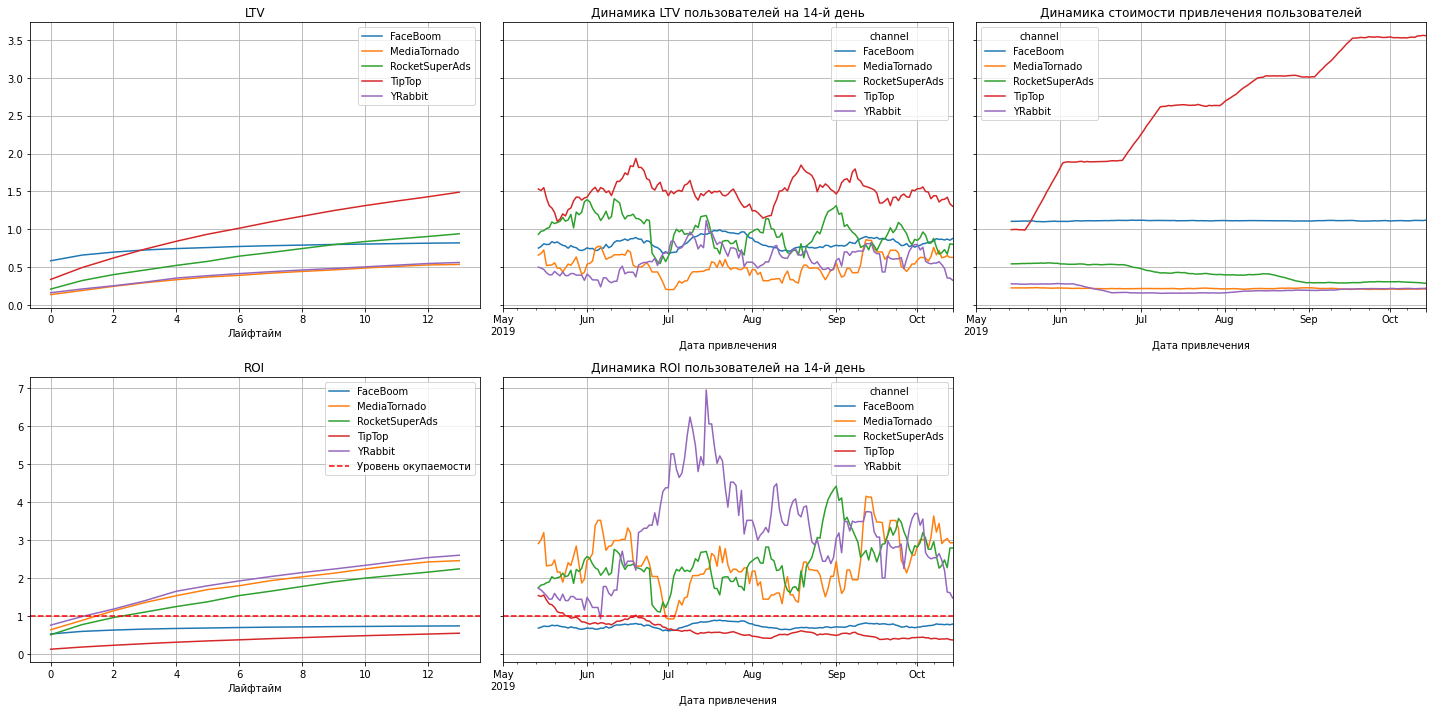

In [52]:
#получение LTV и ROI
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles_ads.query('region == "United States"'),
    orders,
    max_acquisition_date,
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)

#графики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, 14, window=14)

Срез данных из США показывает, что средства, вложенные в рекламу каналов **FaceBoom** и **TipTop**, чья аудитория расположена в этих странах, не привели к росту LTV и ROI для первого и привели к уменьшению ROI для второго.

Кроме того, в этой же стране расположены аудитории трёх из четырёх худших для вложения рекламных средств каналов:  **YRabbit** , **MediaTornado**, и **OppleCreativeMedia**.

### Вывод по разделу

На момент начала анализа (май 2019 г.) реклама, направленная на привлечение пользователей, в целом окупалась. Затем показатель возврата на инвестиции снижался в несколько этапов, и начиная со второй половины июня упал ниже уровня окупаемости, и продолжил снижаться далее.

Негативное влияние в этом процессе оказывают последствия перераспределения рекламного бюджета в пользу дополнительных вложений в рекламные каналы **FaceBoom** и **TipTop** и попытки привлечения в приложение дополнительной аудитории из США в ущерб другим странам. Также падение эффективности рекламных расходов связано с чрезмерным вниманием к рекламе среди пользователяй **iPhone** и **Mac**.


**Общий LTV клиентов 14-го дня** в среднем достигает значения 0,9. 

LTV клиентов 14-го дня падает для клиентов, привлечённых в первой половине мая, затем растёт для клиентов, привлечённых до конца мая, после чего колеблется около значения 0,9 до конца периода наблюдения, падая для клиентов, привлечённых в начале июня и во второй половине июня, июля и августа, в середине сентября и начале октября.

Стоимость привлечения клиентов (САС) также растёт на протяжении всего времени наблюдений, начиная с 0,71 - 0,78 в первой половине мая до значений более 1 к концу июня, затем последовал постепенный рост до сентября: по-видимому, расходы увеличивались в конце июня, начеле августа и сентября, чтобы увеличить снизившиеся к этому моменту значения LTV 14-го дня; после чего расходы колебались около 1,80 до конца периода наблюдений.

Значение возврата на инвестиции (ROI) на 14 лайфтайм (0,81) по периоду наблюдений по всем клиентам в среднем не выходит на точку окупаемости. В динамике ROI падает в первой половине мая, затем следует короткий рост, после чего ROI падает ниже точки окупаемости, затем в первой половине июня колеблется вокруг уровня окупаемости, затем постепенно падает до уровня менее 70% в октябре.

Можно сделать следующий вывод:руководством было принято решение с середины мая начать активно вкладывать средства в рекламные кампании, рекламный бюджет был увеличен в полтора раза (что подтверждается данными из раздела 4). Это привело к росту LTV клиентов, который продолжался на протяжении короткого периода времени, однако затем рост LTV остановился, после чего несмотря на постепенное увеличение расходов LTV в среднем оставался в одних и тех же рамках, вследствие чего возврат на инвестиции (ROI) упал ниже уровня окупаемости и впоследствии падал дальше. 

**Средняя конверсия** по всем пользователям, привлечённым через рекламные источники, достигает уровня 8,01%.

Конверсия пользователей **PC** кратно ниже, чем у пользователей остальных устройств? при этом постепенно снижается. Наибольшая конверсия у пользователей **iPhone** и **Mac**.

Удержание пользователей **PC** немного выше, чем пользователей остальных устройств. 

Общая конверсия за весь период наблюдений в США почти вдвое выше, чем в остальных странах. В динамике видно, что конверсия в США была выше, чем в других странах на момент начала наблюдений (май), а с июня увеличилась примерно на 15%, в то время как конверсия в других странах сопоставимо снизилась.

Общее удержание пользователей в США примерно на 20% ниже, чем в остальных трёх странах, показатели которых близки друг к другу. Удержание пользователей в США сотаётся примерно на одном уровне на протяжении всего преиода наблюдений. Для оцнеки динамики удержания пользователей из других стран, видимо недостаточно данных: можно лишь сказать, что удержание пользователей из Соединенного Королевства росло в мае-июне, затем снизилось в конце июня-начале июля.


Наибольшая конверсия у пользователей, привлечённых через каналы **FaceBoom**, **AdNonSence**, **lambdaMediaAds** и **TipTop**. Из них конверсия **Faceboom** и **TipTop** остаётся стабильной в динамике, конверсия  **AdNonSence** проседает в июле-начале сентября, а конверсия **lambdaMediaAds** показывает скачок в июне и провал в начале сентября. Явные аутсайдеры - **Yrabbit**, **MediaTornado**, **LeapBob** и **OppleCreativeMedia**. Конверсия на канале **WahooNetBanner**, сравнительно невысокая, демонстрирует к тому же снижение в динамике. Конверсия канала **RocketSuperAds** стабильно средняя. 

Удержание пользователей **FaceBoom** и **TipTop** гораздо хуже, чем у остальных каналов. Остальные каналы демонстрируют сходие показатели, кроме **Yrabbit** и **MediaTornado**, удержанире 14-го дня у которых почти вдвое ниже, чем у остальных.

Данных для оценки динамики удержания достаточно только для **FaceBoom**, чьё удержание пользователей на 14-й день стабильно низкое, около нуля. И **TipTop**, удержание в которой сильно колеблется вокруг одного и того же значения в течение периода наблюдений, с общей тенденцией к небольшому снижению.


**Из всех устройств** на уровень окупаемости выходят только показатели пользователей PC. Хуже обстоят дела с пользователями Andriod. Худшие по показателю возврата на инвестиции и окупаемости - пользователи iPhone и Mac. 

Превосходство показателей окупаемости пользователей PC И Android над iPhone и Mac очевидно связано с тем, что рост расходов на рекламу  для последних значительно превышают рост расходов на рекламу для первых, при том что LTV для всех устройств в среднем за весь период наблюдений колеблется вокруг одних и тех же значений.

Динамика LTV и CAC 14-го дня в целом соответствует паттерну, выявленному на предыдущих этапе исследования: при стабильных расходах на рекламу или их незначительном уменьшении выручка падает; рост вложений в рекламу приводит к кратковременному (1-2 недели) росту LTV, однако затем присохранении уровня финансирования рекламных каналов LTV длоя всех устройств падает до следующего периода  увеличения вложений в рекламу; затем ситуация повторяется. 

Пользователи PC активнее прочих реагируют как на дополнительные волжения в рекламу, так и на сохранение/уменьшение расходов на рекламные кампании.

**Самый высокий показатель LTV 14-го дня - у пользователей из США**, он превышает значение 1, LTV для других стран близки друг к другу. Очевидно, по этой причине руководством компании в середине мая было приянто решение перераспределить рекламный бюджет в пользу проведения кампаний в США стране за счёт остальных. Однако рост выручки от пользователей в этой стране в первой половине июня оказался недостаточным, прекратился во второй половине июня, и дальше не рос, а стабильно колебался вокруг одного значения (1), в результате чего возврат на инвестиции опустился ниже уровня окупаемости и затем продолжил падать.
Всё это привело к тому, что окупаемость вложений в рекламу в США оказалась намного ниже, чем в других странах.

Из других стран следует отметить Соединённое Королевство: LTV 14-го дня пользователей, привлечённых в июле и августе в этой стране в среднем выше, чем в других странах, кроме того, этот показатель в этой стране увеличивался без дополнительных вложений в рекламу. Также снижение рекламных расходов в этой стране в конце мая-начале июня не привело к заметному снижению LTV 14-го дня. Всё что может свидетельствовать об интересе потенциальных пользователей к приложению в этой стране. 

Срез данных по LTV, ROI и CAC ркламных каналов из США показывает, что средства, вложенные в рекламу каналов **FaceBoom** и **TipTop**, чья аудитория расположена в этих странах, не привели к росту LTV и ROI для первого и привели к уменьшению ROI для второго.

Кроме того, в этой же стране расположены аудитории трёх из четырёх худших для вложения рекламных средств каналов:  **YRabbit** , **MediaTornado**, и **OppleCreativeMedia**.

Вывод: увеличение рекламных расходов в США оказалось неэффективным. Возможно, следует изучить возможность дополнительного вложения средств в рекламу в Соединённом Королевстве.

**Дополнительное вложение в рекламу** через канал **FaceBoom** привело к росту количества привлекаемых клиентов: этот вывод можно сделать из того, что стоимость привлечения осталась на одном уровне при увеличении рекламных расходов (см.пункт 4.3) и стабильном LTV. Однако окупаемость инвестиций на этом канале осталась практически на прежнем уровне, что означает, что увеличившаяся привлечённая аудитория не приносит дополнительной выручки; вероятно, средний чек привлечённой в результате рекламы аудитории оказался ниже, чем раньше, т.е. привлечённые в результате рекламы клиенты - менее "качественные". Кроме того, очень низкий LTV пользователей этого канала несмотря на дополнительные вложения в рекламу почти не растёт с увеличением лайфтайма, что также говорит о низком "качестве" клиентов. Возврат на инвестиции по этому каналу почти не изменился и остался ниже уровня окупаемости. При том, что у этого канала очень высокая конверсия,  удержание пользователей здесь очень низкое. Вероятно, дополнительная реклама на этом канале привлекает в приложение пользователей, которые вначале совершают покупки, но очень быстро теряют интерес.

Дополнительное вложение в рекламу через канал **TipTop** привело по большей части к увеличению стоимости привлечения, но не к росту количества привлекаемых клиентов и/или их LTV 14-го дня. В результате несмотря на то, что показатель LTV 14-го дня для этого канала - один из лучших, возврат на инвестиции по этому каналу не только не вырос, но и опустился ниже уровня окупаемости. При том, что у этого канала стабильно высокая конверсия, дополнительные расходы на рекламу через этот источник не приводят к росту выручки.

В мае-июне расходы на рекламу были снижены для каналов **AdNonSence**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado**, и увеличены для **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob**. Начиная с конца июня соотношение расходов на все эти восемь каналов почти не менялось (см. п. 4.5)

Каналы, ROI которых оказался ниже окупаемости - **FaceBoom**, **TipTop** (для этих двух такое положение вещей связано с неокупившейся по разным причиной рекламой) и **AdNonSence**.

Канал **AdNonSence**, несмотря на снижение расходов на рекламу в мае-июне, продемонстрировал рост LTV 14-го дня в полтора раза, притом без дополнительных вложений в рекламу этот в дальнейшем рост LTV в среднем продожился, и с конца августа вышел на уровень окупаемости. Тем не менее, LTV 14-го дня у этого канала всё ещё слишком низкий, чтобы рекомендовать его в качестве точки роста, даже несмотря на высокую конверсию пользователей на этом канале. Кроме того, у канала очень низкое удержание. 

Канал **RocketSuperAds** отреагировал снижением LTV на снижение расходов на рекламу в мае-июне, однако затем при незначительном дальнейшем снижении расходов на рекламу средняя стоимость привлечения клиента постепенно снизилась вдвое, что при стабильном LTV может означать увеличение привлекаемой аудитории. Вследствие того, что LTV что при этом в августе-октябре менялся слабо, показатель возврата на инвестиции для этого канала, и так находящийся выше окупаемости, вырос ещё больше. Посколькуу этого канала стабильно средняя конверсия, а стоимость привлечения клиентов падает, что приводит к тому, что показатель ROI к октябрю здесь один из лучших, этот канал можно рассмотреть в качестве возможной точки роста. 

Вызывают интерес показатели канала **lambdaMediaAds**. Средний LTV канала - наибольший. LTV 14-го дня остаётся стабильным даже несмотря на некоторое снижение рекламных расходов в мае-июне, а стоимость привлечения клиентов даже незначительно снижается на всём периоде наблюдений. LTV 14-го дня показывает резкий рост для пользователей, привлечённых в июне и снижение в сентябре: это может быть связано с внешними факторами, к примеру увеличением или снижением аудитории канала, либо с сезонностью (к примеру, если значительная часть аудитории канала - ученики и студанты), либо другими. Вдобавок у этого канала сравнительно высокая конверсия и неплохое удержание. 


Канал **YRabbit** занимает первое место по возврату на инвестиции и уровню окупаемости. Аудитория канала отреагировала на снижение рекламных расходов в мае-июне незначительным падением LTV и снижением средней стоимости привлечения клиентов, однако в дальнейшем LTV канала вырос и до конца периода наблюдений держался выше значений начала мая. Вызывает вопросы резкий рост LTV в июле, что при невысокой стоимости привлечения привело к росту показателя окупаемости до аномальных значений: необходимо выяснить, является ли  это сезонной активностью аудитории или результатом ошибки в собранных данных. Также у этого канала очень низкие показатели конверсии и удержания.

Из остальных каналов у **MediaTornado**, **LeapBob** и **OppleCreativeMedia** самые низкие показатели LTV. Низкая стоимость привлечения пользователей позволяет им выйти на уровень окупаемости, однако с учётом низкой конверсии пользователей у этих каналов (а для **MediaTornado** - ещё и низком удержании) можно предположить, что реклама на этих каналах не приносит достаточной выгоды.

## Общий вывод

**Цель проекта**: выяснить причины убытков компании и дать рекомендации отделу маркетинга.

**Задачи проекта**: 

- изучить источники привлечения пользователей и используемые ими устройства;
- выяснить стоимость привлечения пользователей из различных рекламных каналов;
- изучить LTV клиентов;
- изучить окупаемость затрат на  рекламу;
- определить факторы, мешающие привлечению клиентов.

### Исследовательский анализ данных

#### Распределение пользователей приложения по странам, устройствам, которыми они пользуются и рекламным источникам привлечения

Наибольшее количество пользователей приходят в приложение не из платных каналов привлечения (**"органический"** трафик): 58439 клиентов, при этом количество платящих из них всего 1160, что в несколько раз меньше, чем тот же показатель для ближайшего по количеству привлечённых пользователей платного канала (**FaceBoom**). Процент платящих среди **"органических"** пользователей минимальный: 2,06%.

Среди платных каналов привлечения по количеству выделяются несколько групп.

Прежде всего, выделяются два лидера, обгоняющие по количеству клиентов всех остальных: **FaceBoom** (29144) и **TipTop** (19561). Из них **FaceBoom** демонстрирует также наибольшее количество платящих пользователей (3557) и наибольший процент платящих пользователей (12,2%). 

Наименьший показатель привлечённой аудитории среди платных каналов у **lambdaMediaAds** (2149), но при этом у этого канала одно из самых высоких значений процента платящих пользователей (10,47%). Этот канал может быть потенциальной точкой роста.

Следующая группа по количеству пользователей - **OppleCreativeMedia** (8605), **WahooNetBanner**  (8553) и **LeapBob** (8553). Из них лучший процент привлечённых покупателей у **WahooNetBanner** (5,3%), у остальных заметно ниже - 2,71% для **OppleCreativeMedia** и 3,06 для **LeapBob**.

Последняя группа по количеству пользователей - **AdNonSense** (3880), **YRabbit** (4312), **MediaTornado** (4364) и **RocketSuperAds** (4448). **AdNonSense** демонстрирует один из самых высоких показателей процента платящих пользователей (11,34%) и может быть потенциальной точкой роста. Также хороший процент платящих среди пользователей **RocketSuperAds**, к тому же этот канал привлёк самую большую аудиторию из этой группы (4448).

Резюме: 
 - **"органический"** трафик приносит самое большое количество пользователей, но среди них минимальный процент платящих;
 - **FaceBoom** и **TipTop** явные фавориты среди платных каналов привлечения;
 - из прочих каналов следует отметить **WahooNetBanner**, **AdNonSense** и **RocketSuperAds** как потенциально перспективные точки роста аудитории.
 
 
 
### Маркетинг

#### Расходы на маркетинг, их распределение по рекламным источникам и динамика

Общая сумма расходов на маркетинг: 105497,3.

Наибольшие суммы были вложены в рекламные кампании через каналы привлечения **TipTop** (54751,3) и **FaceBoom** (32445,6). Наименьшие суммы израсходованы через каналы **MediaTornado** (945.48) и **YRabbit** (944.22).

Расходы на рекламу через наиболее используемый канал **TipTop** в среднем постепенно увеличивались с мая по август, в сентябре несколько снизились, с конца сентября снова последовал рост. Расходы на привлечение через второй по объёму затраченных средств канал **FaceBoom** увеличивались в мае-июне, затем колебались около 6000 в месяц.

В мае-июне расходы на рекламу были снижены для каналов **AdNonSence**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado**, и увеличены для **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob**. Начиная с конца июня соотношение расходов на все эти восемь каналов почти не менялось.

В течение периодов 23-24, 27-29, 35-36, 39-42 недель общие расходы снижались, на отрезках 21-22, 24-26, 29-31,37-39, 42-43 недель увеличивались. В среднем рекламные расходы увеличивались с мая до начала сентября, в сентябре снизились, с конца сентября последовал рост.

Средняя стоимость привлечения клиента

Средняя стоимость привлечения пользователей за весь период максимальна для канала, получившено максимальное финансирование - **TipTop** (2.8), вторым идёт канал **FaceBoom**, являющийся вторым лидером по объёму затраченных рекламных среств (1,11). Канал **AdNonSence** имеет близкий к каналам-лидерам показатель средней стоимости привлечения клиентов. Минимальная средняя стоимость привлечения у каналов **OppleCreativeMedia** (0.25), **YRabbit** (0.22), **MediaTornado** (0.22) и **LeapBob** (0.21).


### Оценка эффективности привлечения пользователей

Основные причины неэффективности привлечения пользователей связаны с перераспределением в мае-июне 2019 г. рекламного бюджета в пользу дополнительных вложений в рекламные каналы **FaceBoom** и **TipTop** и попытки привлечения в приложение дополнительной аудитории из **США** в ущерб другим странам. Также падение эффективности рекламных расходов связано с чрезмерным вниманием к рекламе среди пользователяй **iPhone** и **Mac**.

Вследствие этого реклама, направленная на привлечение пользователей, которая на момент начала анализа (май 2019 г.) в целом окупалась, к концу рассматриваемого периода стала приводить к убыткам.


Негативное влияние в этом процессе оказывают последствия перераспределения рекламного бюджета в пользу дополнительных вложений в рекламные каналы **FaceBoom** и **TipTop** и попытки привлечения в приложение дополнительной аудитории из США в ущерб другим странам. Также падение эффективности рекламных расходов связано с чрезмерным вниманием к рекламе среди пользователяй **iPhone** и **Mac**.

Срез данных по LTV, ROI и CAC ркламных каналов из США показывает, что средства, вложенные в рекламу каналов **FaceBoom** и **TipTop**, чья аудитория расположена в этой стране, не привели к ожидаемому росту LTV и ROI для первого и привели к росту CAC и  уменьшению ROI для второго.

Кроме того, в этой же стране расположены аудитории трёх из четырёх худших для вложения рекламных средств каналов:  **YRabbit** , **MediaTornado**, и **OppleCreativeMedia**.

Затем, конверсия за весь период наблюдений в США почти вдвое выше, чем в остальных странах. В динамике видно, что конверсия в США была выше, чем в других странах на момент начала наблюдений (май), а с июня увеличилась примерно на 15%, в то время как конверсия в других странах сопоставимо снизилась. Общее удержание пользователей при этом в США примерно на 20% ниже, чем в остальных трёх странах, показатели которых близки друг к другу. Это говорит о том, что дополнительные расходы на рекламу в США привлекли новых пользователей, которые хорошо конвертируются в покупателей, но затем быстро теряют интерес к приложению, что невыгодно.

Из других стран следует отметить Соединённое Королевство: LTV 14-го дня пользователей, привлечённых в июле и августе в этой стране в среднем выше, чем в других странах, кроме того, этот показатель в этой стране увеличивался без дополнительных вложений в рекламу. Также снижение рекламных расходов в этой стране в конце мая-начале июня не привело к заметному снижению LTV 14-го дня. Всё что может свидетельствовать об интересе потенциальных пользователей к приложению в этой стране.

**Из всех устройств** на уровень окупаемости выходят только показатели пользователей PC. Хуже обстоят дела с пользователями Andriod. Худшие по показателю возврата на инвестиции и окупаемости - пользователи iPhone и Mac. 

Превосходство показателей окупаемости пользователей PC И Android над iPhone и Mac очевидно связано с тем, что рост расходов на рекламу  для последних значительно превышают рост расходов на рекламу для первых, при том что LTV для всех устройств в среднем за весь период наблюдений колеблется вокруг одних и тех же значений.

Пользователи PC активнее прочих реагируют как на дополнительные волжения в рекламу, так и на сохранение/уменьшение расходов на рекламные кампании.
Приэтом конверсия пользователей PC заметно хуже, чем  у остальных, что ухудшает ситуацию.

**Оценка эффективности рекламных источников**

Дополнительное вложение в рекламу через канал **FaceBoom** привело к росту количества привлекаемых клиентов: этот вывод можно сделать из того, что стоимость привлечения осталась на одном уровне при увеличении рекламных расходов (см.пункт 4.3) и стабильном LTV. Однако окупаемость инвестиций на этом канале осталась практически на прежнем уровне, что означает, что увеличившаяся привлечённая аудитория не приносит дополнительной выручки; вероятно, средний чек привлечённой в результате рекламы аудитории оказался ниже, чем раньше, т.е. привлечённые в результате рекламы клиенты - менее "качественные". Кроме того, очень низкий LTV пользователей этого канала несмотря на дополнительные вложения в рекламу почти не растёт с увеличением лайфтайма, что также говорит о низком "качестве" клиентов. Возврат на инвестиции по этому каналу почти не изменился и остался ниже уровня окупаемости. При том, что у этого канала очень высокая конверсия,  удержание пользователей здесь очень низкое. Вероятно, дополнительная реклама на этом канале привлекает в приложение пользователей, которые вначале совершают покупки, но очень быстро теряют интерес.

Дополнительное вложение в рекламу через канал **TipTop** привело по большей части к увеличению стоимости привлечения, но не к росту количества привлекаемых клиентов и/или их LTV 14-го дня. В результате несмотря на то, что показатель LTV 14-го дня для этого канала - один из лучших, возврат на инвестиции по этому каналу не только не вырос, но и опустился ниже уровня окупаемости. При том, что у этого канала стабильно высокая конверсия, дополнительные расходы на рекламу через этот источник не приводят к росту выручки.

В мае-июне расходы на рекламу были снижены для каналов **AdNonSence**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado**, и увеличены для **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob**. Начиная с конца июня соотношение расходов на все эти восемь каналов почти не менялось (см. п. 4.5)

Каналы, ROI которых оказался ниже окупаемости - **FaceBoom**, **TipTop** (для этих двух такое положение вещей связано с неокупившейся по разным причиной рекламой) и **AdNonSence**.

Канал **AdNonSence**, несмотря на снижение расходов на рекламу в мае-июне, продемонстрировал рост LTV 14-го дня в полтора раза, притом без дополнительных вложений в рекламу этот в дальнейшем рост LTV в среднем продожился, и с конца августа вышел на уровень окупаемости. Тем не менее, LTV 14-го дня у этого канала всё ещё слишком низкий, чтобы рекомендовать его в качестве точки роста, даже несмотря на высокую конверсию пользователей на этом канале. Кроме того, у канала очень низкое удержание.

Канал **RocketSuperAds** отреагировал снижением LTV на снижение расходов на рекламу в мае-июне, однако затем при незначительном дальнейшем снижении расходов на рекламу средняя стоимость привлечения клиента постепенно снизилась вдвое, что при стабильном LTV может означать увеличение привлекаемой аудитории. Вследствие того, что LTV что при этом в августе-октябре менялся слабо, показатель возврата на инвестиции для этого канала, и так находящийся выше окупаемости, вырос ещё больше. Посколькуу этого канала стабильно средняя конверсия, а стоимость привлечения клиентов падает, что приводит к тому, что показатель ROI к октябрю здесь один из лучших, этот канал можно рассмотреть в качестве возможной точки роста. 

Вызывают интерес показатели канала **lambdaMediaAds**. Средний LTV канала - наибольший. LTV 14-го дня остаётся стабильным даже несмотря на некоторое снижение рекламных расходов в мае-июне, а стоимость привлечения клиентов даже незначительно снижается на всём периоде наблюдений. LTV 14-го дня показывает резкий рост для пользователей, привлечённых в июне и снижение в сентябре: это может быть связано с внешними факторами, к примеру увеличением или снижением аудитории канала, либо с сезонностью (к примеру, если значительная часть аудитории канала - ученики и студанты), либо другими. Вдобавок у этого канала сравнительно высокая конверсия и неплохое удержание. 


Канал **YRabbit** занимает первое место по возврату на инвестиции и уровню окупаемости. Аудитория канала отреагировала на снижение рекламных расходов в мае-июне незначительным падением LTV и снижением средней стоимости привлечения клиентов, однако в дальнейшем LTV канала вырос и до конца периода наблюдений держался выше значений начала мая. Вызывает вопросы резкий рост LTV в июле, что при невысокой стоимости привлечения привело к росту показателя окупаемости до аномальных значений: необходимо выяснить, является ли  это сезонной активностью аудитории или результатом ошибки в собранных данных. Также у этого канала очень низкие показатели конверсии и удержания.

Из остальных каналов у **MediaTornado**, **LeapBob** и **OppleCreativeMedia** самые низкие показатели LTV. Низкая стоимость привлечения пользователей позволяет им выйти на уровень окупаемости, однако с учётом низкой конверсии пользователей у этих каналов (а для **MediaTornado** - ещё и низком удержании) можно предположить, что реклама на этих каналах не приносит достаточной выгоды.

### Рекомендации для отдела маркетинга


Вывод: увеличение рекламных расходов в США оказалось неэффективным. Возможно, следует изучить возможность дополнительного вложения средств в рекламу в Соединённом Королевстве.

Для возврата эффективности рекламных вложений на уровень окупаемости необходимо:

- постепенно снизить вложения в рекламу на каналах **FaceBoom** и **TipTop** до уровня начала мая. Делать это нужно плавно во избежание резкого падения показателей выручки для этих каналов;

- постепенно снизить вложения в рекламу в США (каналы **FaceBoom**, **TipTop**, **MediaTornado**, **LeapBob** и **OppleCreativeMedia**) и попробовать понемногу увеличивать расходы на рекламу в Соединённом королевстве (каналы **RocketSuperAds** и **lambdaMediaAds**), постепенно отслеживая результат;

- перейти от стратегии предпочтительного вложения средств в привлечение пользователей устройств **iPhone** и **Mac** к стратегии более сбалансированных по различным устройствам трат на рекламу; попробовать вложить дополнительные средства в рекламу среди пользователей **PC** и, если это приведёт к росту выручки, увеличить вложения средств в рекламу среди этой аудитории.


### О качестве данных

Дубликатов, явных ошибок и аномальных значений в данных нет. Понадобилось переименовать столбцы датафреймов для приведения их к правильному стилю, а также привести столбцы, содержащие дату и время, к типам данных времени pandas.